# Using Machine Learning Tools 2020
# Assignment 3: Deep Neural Networks

## Overview

In this assignment you will implement two types of deep learning network (fully connected and convolutional neural networks) to classify images of hands in poses corresponding to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train two different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore different cases of over-fitting and under-fitting, and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing optimised deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, and optimize performance. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General Instructions 

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, as indicated in this template.
 - Your code must use the current stable versions of python libraries, not outdated versions.
 - All data processing must be done within the notebook after loading the data.
 - Comment your code, so that its purpose is clear to the reader.
 - **Before submitting your notebook, make sure to run all cells in your final notebook so that it works correctly.**

This assignment is divided into several tasks. Stick to this notebook format, although feel free to add cells throughout, but keep the same numbering for all instructions, questions and answers.

Make sure to answer every question with *separate answer text (“Answer: ...”) in a cell* and check that you answered all sub-questions/aspects within the question. The text answers are worth points.

Make the *figures self-explanatory and unambiguous*. Always include axis labels, if available with units, unique colours and markers for each curve/type of data, a legend and a title. Give every figure a number (e.g. at start of title), so that it can be referred to from different parts of the text/notebook. This is also worth points!

## Outline

The main steps in the assignment are outlined here, so that you can appreciate the bigger picture. Some of the steps are purely for testing your knowledge and demonstrating certain things, but in general it outlines the main process that you would go through to solve a practical problem.

- To start with we load the data, visualise and explore it. You should always do this in any problem.

- After this we will establish how long a simple network takes to run on a given amount of training data on your computer. This is important for this assignment as you have to run on your own machines, and we need to make sure it runs in a reasonable amount of time. In a practical problem you are likely to have a lot more data and will use bigger networks, but it is common that you will have a limit on the available resources and time, so establishing a baseline timing and deciding on constraints is a very common task in any problem.

- Following this we will go through a few specific cases, looking at some extremes and learning to identify common problems, how to spot them and options for how to correct for them.

- Afterwards, the main bulk of the assignment will focus on tuning the networks to give the best performance. This is something you will need to do systematically, and demonstrates the approach that you would take in any practical problem. Some limitations will be given, in order to help you in this assignment, but it should be clear how to extrapolate these to a more general setting for other datasets and tasks.

- Once the optimal network is found, the performance will be evaluated.

- A free choice element at the end will allow you to explore one extra aspect, beyond the limitations imposed above.


Feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

## Your Details

Pang Tak Yin - a1796036

## Initialise environment

In [3]:
# Load libraries, etc.
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Add other libraries here
# Common imports
import numpy as np
import os, time
import pandas as pd
import time

from sklearn import preprocessing

# Deep Learning imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers
from tensorflow.keras import layers

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hypermodel import HyperModel
from kerastuner.engine.hyperparameters import HyperParameters


## 1. Explore the Dataset (10%)

### 1.1 Load the data
 - We will use an MNIST-style dataset of sign language signals (hands), which are all small images (28x28)
 - Files are sign_mnist_train.csv and sign_mnist_test.csv
 - Split up labels and images
 - Reshape images appropriately

In [4]:
#Training data
#read the csv file into dataframe
df_train = pd.read_csv('sign_mnist_train.csv')
#split the labels and images data
df_train_target = df_train.pop('label')
df_train_data = df_train

#Testing data
# read the csv file into dataframe
df_test = pd.read_csv('sign_mnist_test.csv')
#split the labels and images data
df_test_target = df_test.pop('label')
df_test_data = df_test

#use sklearn labelencoder to encoding to the label class
le = preprocessing.LabelEncoder()

le.fit(df_train_target)

np_train_target = le.transform(df_train_target)
np_test_target = le.transform(df_test_target)

#convert dataframe to numpy array
np_train_data = df_train_data.to_numpy()
np_test_data = df_test_data.to_numpy()
#reshape the image
np_train_data_set = np_train_data.reshape(-1,28,28)
np_test_data_set = np_test_data.reshape(-1,28,28)

### 1.2 Look at the data
- Print out some descriptive information about the dataset
- Show one example image of each class

In [4]:
print(f'Number of data points in training data:{df_train_data.shape[0]}')
print(f'Number of data points in testing data:{df_test_data.shape[0]}')
print(f'The image shape is:{np_train_data_set.shape[1:3]}')

Number of data points in training data:27455
Number of data points in testing data:7172
The image shape is:(28, 28)


label:0
class:A


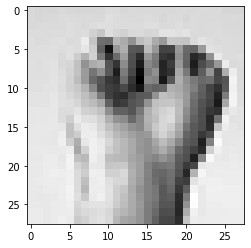

label:1
class:B


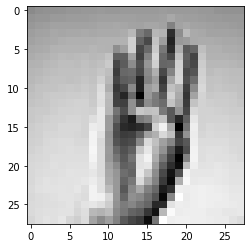

label:2
class:C


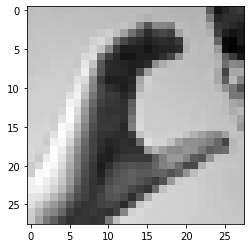

label:3
class:D


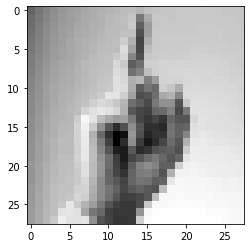

label:4
class:E


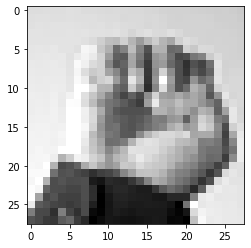

label:5
class:F


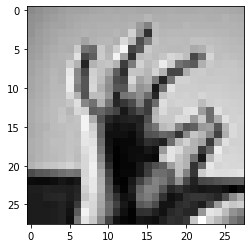

label:6
class:G


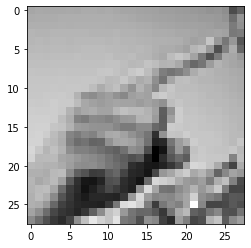

label:7
class:H


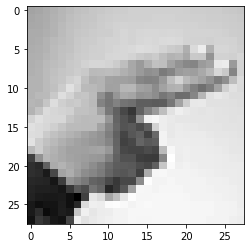

label:8
class:I


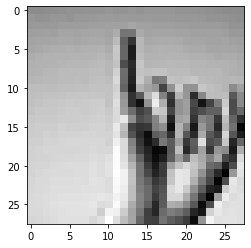

label:9
class:K


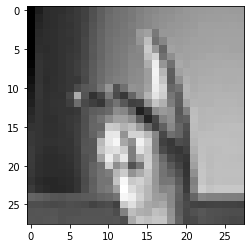

label:10
class:L


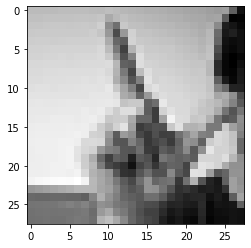

label:11
class:M


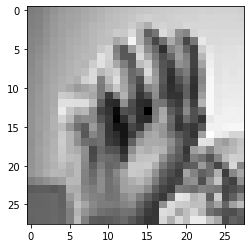

label:12
class:N


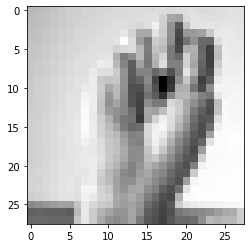

label:13
class:O


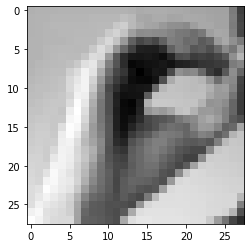

label:14
class:P


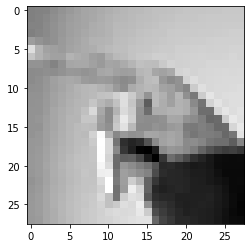

label:15
class:Q


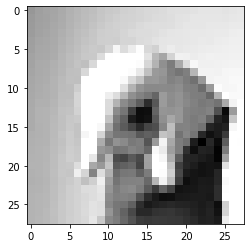

label:16
class:R


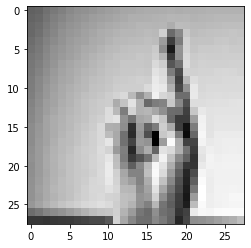

label:17
class:S


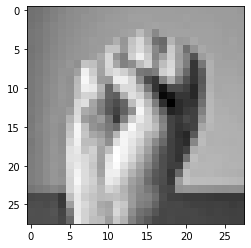

label:18
class:T


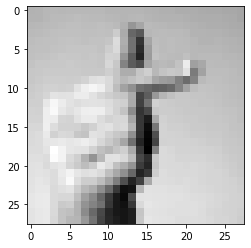

label:19
class:U


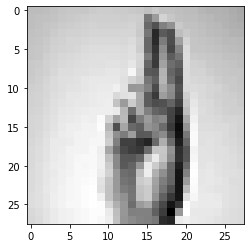

label:20
class:V


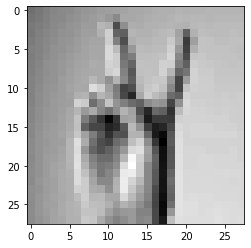

label:21
class:W


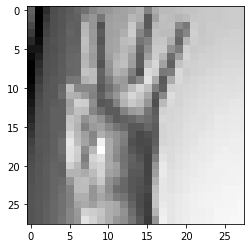

label:22
class:X


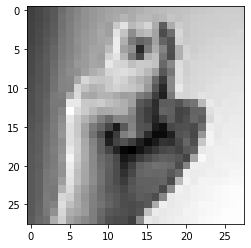

label:23
class:Y


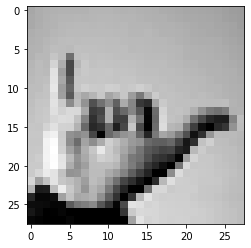

In [5]:
#show one example image of each class in train set
class_name = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

for i in range(24):
    for j in range(100):
        if np_train_target[j] == i:
            print(f'label:{i}\nclass:{class_name[i]}')
            plt.imshow(np_train_data_set[j], cmap='gray')
            plt.grid(False)
            plt.show()
            break

label:0
class:A


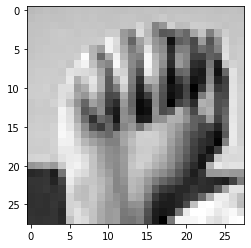

label:1
class:B


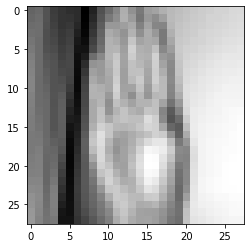

label:2
class:C


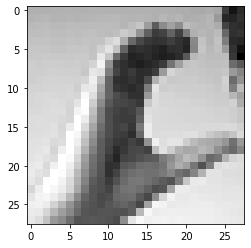

label:3
class:D


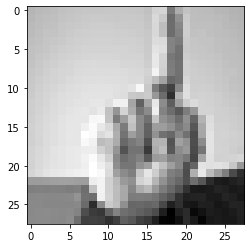

label:4
class:E


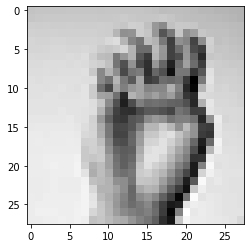

label:5
class:F


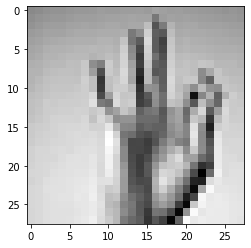

label:6
class:G


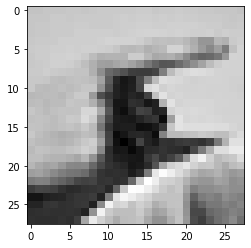

label:7
class:H


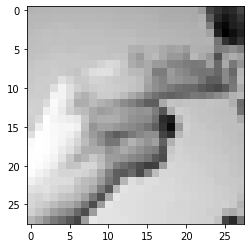

label:8
class:I


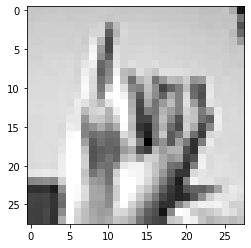

label:9
class:K


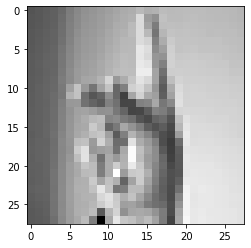

label:10
class:L


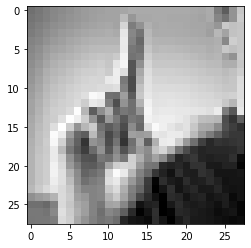

label:11
class:M


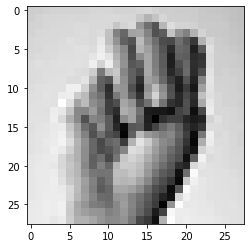

label:12
class:N


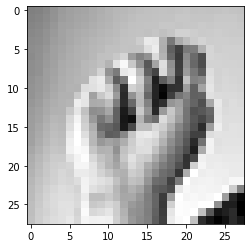

label:13
class:O


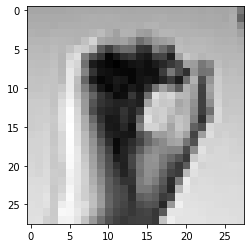

label:14
class:P


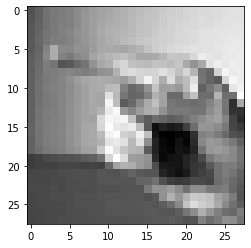

label:15
class:Q


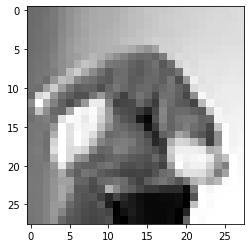

label:16
class:R


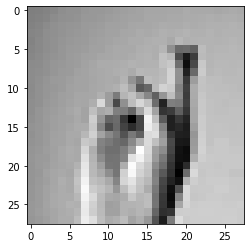

label:17
class:S


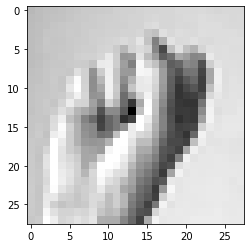

label:18
class:T


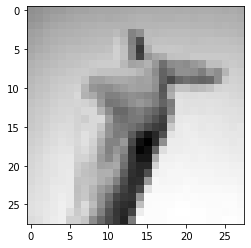

label:19
class:U


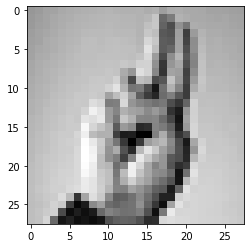

label:20
class:V


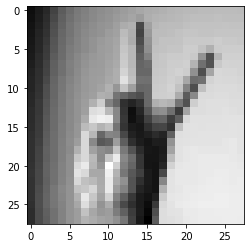

label:21
class:W


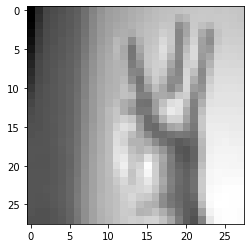

label:22
class:X


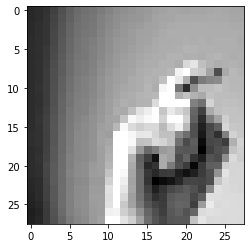

label:23
class:Y


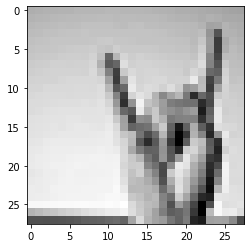

In [6]:
#show one example image of each class in test set
class_name = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

for i in range(24):
    for j in range(100):
        if np_test_target[j] == i:
            print(f'label:{i}\nclass:{class_name[i]}')
            plt.imshow(np_test_data_set[j], cmap='gray')
            plt.grid(False)
            plt.show()
            break

### Question 1.3
- Which pair of classes do you think will be the most difficult to distinguish?  Give a reason for your answer.

I think Class M and N are the most difficult to distinguish. 
Both of them hide the thumb behind the other fingers but with ring finger cover or without cover the thumb. 
Since the thumb is hiden, it is difficult to tell how many fingers are coving it. 
The Only different in these 2 class is that the position of ring finger is sightly different. 

### 1.4 Look at the labels
- Look at the distribution of the labels
- Adjust for anything that could cause problems later on

In [7]:
#show the distribution of the labels of training set
df_train_target.value_counts().sort_index()

0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

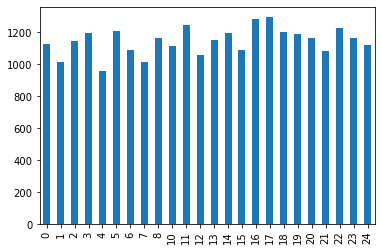

In [8]:
#plot the bar graph to have a clear look. 
df_train_target.value_counts().sort_index().plot.bar()

Although the number of labels in different class are not equal, they are more or less evenly distributed. 
And every class has good amount of labels, it will not cause problems during training. 

In [9]:
#show the distribution of the labels of testing set
df_test_target.value_counts().sort_index()

0     331
1     432
2     310
3     245
4     498
5     247
6     348
7     436
8     288
10    331
11    209
12    394
13    291
14    246
15    347
16    164
17    144
18    246
19    248
20    266
21    346
22    206
23    267
24    332
Name: label, dtype: int64

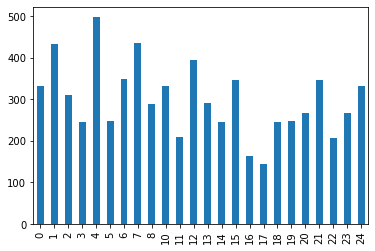

In [10]:
#plot the bar graph to have a clear look. 
df_test_target.value_counts().sort_index().plot.bar()

Although the class labels are unevenly distributed, the class with least label has more than 100 labels. Also, test set data will not affect the training process.I think it is alright. 

### 1.5 Split the data (test, validation and training) and scale it
- We will only take the first 2500 training images (which is still over 100 per class) in order to keep run-times down and to make training more challenging. In a practical situation you might either have less data than you'd like or limitations on how much can be processed, so this also reflects a common real-life constraint.
- In this case we will create both the validation and test sets from the testing dataset.  It is unusual to do this, but in this case the training set contains a lot of non-independent, augmented images and it is important that the validation images must be independent. 
- Take 1000 images each for the validation and test sets.
- Scale the data appropriately (e.g. as done for other MNIST datasets).

In [5]:
#first 2500 training data and scale the image 
X_train_sample = np_train_data_set[:2500]/255
y_train_sample = np_train_target[:2500]
#take first 2000 testing data as validation and test data and scale the image 
X_valid_sample, X_test_sample = np_test_data_set[:1000]/255, np_test_data_set[1000:2000]/255
y_valid_sample, y_test_sample = np_test_target[:1000], np_test_target[1000:2000]

### 1.6 Look at label distribution
- Check the label distribution in all three sets and if there are problems, change the selection above.

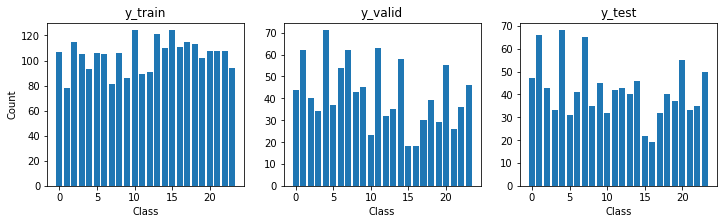

In [6]:
df_y_train_sample = pd.Series(y_train_sample)
df_y_valid_sample = pd.Series(y_valid_sample)
df_y_test_sample = pd.Series(y_test_sample)

fig, sub = plt.subplots(1, 3)
fig.set_size_inches(12,3)
sub[0].bar(df_y_train_sample.value_counts().index,df_y_train_sample.value_counts())
sub[0].set_ylabel('Count')
sub[0].set_xlabel('Class')
sub[0].set_title('y_train')
sub[1].bar(df_y_valid_sample.value_counts().index,df_y_valid_sample.value_counts())
sub[1].set_xlabel('Class')
sub[1].set_title('y_valid')
sub[2].bar(df_y_test_sample.value_counts().index,df_y_test_sample.value_counts())
sub[2].set_xlabel('Class')
sub[2].set_title('y_test')
plt.show()

The label distribution of training data is quite evenly distributed with range from 80-120.
Although the labels of validation data and test data are imbalance, it is alright since we cannot expect balanced data from real world and also it will not affect the training process.  

## 2. Initial Deep Learning Networks (30%)

In this section you will look at a variety of networks with this data and explore various settings and outcomes.

### Question 2.1
 - We will treat this as a classification problem but we could formulate it as a regression problem instead (predicting the label values as the outcomes). Name one disadvantage that a regression approach would have.

The regression approach would be sensitive to imbalance training data.

### Question 2.2
 - What is chance level accuracy (e.g. if predictions were completely random) in this case?

It depends on the label distribution. 
The chance level accuracy of one label would be (number of one label/ total number of all labels) of the test set data. 

### 2.3 Timing Test
 - We will start to work out how long it takes to train a moderately sized network on your machine
 - Build a convolutional neural network (CNN) with the following specifications:
   - All filter (kernel) sizes are 3x3
   - Initial Conv2D layer with 64 filters
   - MaxPooling layer following this
   - Second Conv2D layer with 128 filters
   - Dense output layer after this
 - Set the number of epochs to **20** this time (we will use early stopping methods later but **not** now)
 - Set the batch size to 50
 - Use the *Adam* optimiser, with its default learning rate (we will use the Adam optimiser throughout this assignment)
 - Use the *ELU* activation function for the hidden layers (this will be used throughout)
 - Training/Validation/Testing set sizes are 2500/1000/1000, as described above
 - Use time.time() to determine how long it takes to train your network
 - Plot your learning curves (loss functions and accuracies for training and validation)
 - Calculate the accuracies of the network on both the validation and test datasets
 
If this run takes less than 10 minutes then continue with these settings. If it takes much longer than 10 minutes then reduce the number of training points until it is close to 10 minutes. In the case that you cannot achieve this without reducing the number of training points to less than 250, please contact a course organiser, as you may need to use alternative computational resources.

In [2]:
#limit the gpu usage
MEMORY_LIMIT = 1024*8
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=MEMORY_LIMIT)])
    except RuntimeError as e:
        print(e)

NameError: name 'tf' is not defined

In [14]:
# code here
#  Note that you can reuse code from workshops 8, 9 or 10 here
#  but make sure to modify it to use the appropriate optimiser and activation function

# Some key parameters
n_train = 2500
n_valid = 1000
# Define the number and size of hidden layers
hiddensizes = [64, 128]
# Define the activation function to be used by hidden layers
actfn = "elu"
# Optimiser and learning rate
optimizer = keras.optimizers.Adam
learningrate = 0.001   # Adam default value
# Set size of batch and number of epochs
batch_size = 50
n_epochs = 20

In [15]:
# Reshape the data to be shape [Nx, Ny, 1] for CNN 
cnn_X_train = X_train_sample.reshape((-1, 28, 28, 1))
cnn_X_valid = X_valid_sample.reshape((-1, 28, 28, 1))
cnn_X_test = X_test_sample.reshape((-1, 28, 28, 1))

In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                input_shape=[28, 28, 1]))    # input layer goes into this 2D convolution
model.add(keras.layers.MaxPooling2D(pool_size=2))  

model.add(keras.layers.Conv2D(filters=hiddensizes[1], kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
model.add(keras.layers.Flatten())  
model.add(keras.layers.Dense(24, activation = "softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(lr=learningrate), metrics=["accuracy"]) 

model.summary()

In [1]:
starttime = time.time()

history = model.fit(cnn_X_train, y_train_sample, epochs=n_epochs,batch_size = batch_size,
                    validation_data=(cnn_X_valid, y_valid_sample))

time_used = time.time()-starttime


NameError: name 'time' is not defined

In [17]:
print(f'The time used for training is :{time_used} second')

The time used for training is :7.22128438949585 second


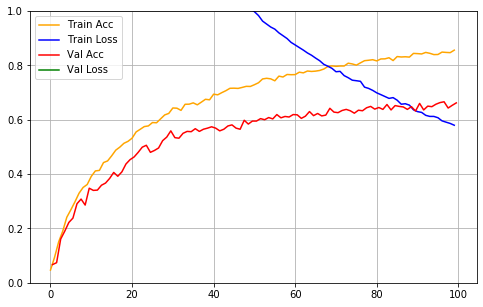

In [18]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.show() 
    
plot_history(history)

In [19]:
val_history = history.history['val_accuracy']

_, test_acc = model.evaluate(cnn_X_test, y_test_sample, verbose=0)

print(f'Best Validation accuracy:{np.max(val_history)}')
print(f'last Validation accuracy:{val_history[-1]}')
print(f'Test accuracy:{test_acc}')

Best Validation accuracy:0.8040000200271606
last Validation accuracy:0.7929999828338623
Test accuracy:0.7710000276565552


### 2.4 Initial Network Exploration
- We will now look at a couple of imperfect cases to get a feeling for what happens in different training situations

### Question 2.5
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

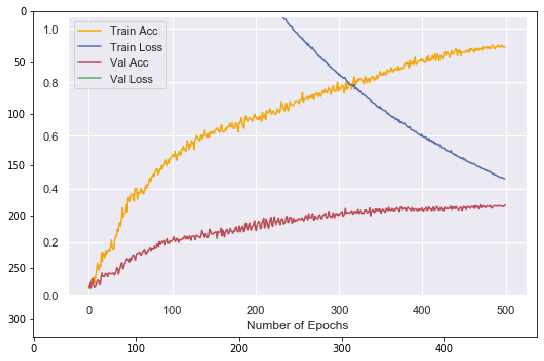

In [20]:
im = plt.imread('LearningPlot1.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

This is over-fitting. Since the Training accuracy is increasing gradually and reached a high accuracy while the validation accuracy is increasing slowly at the beginnig and plateaued in low accuracy level, it overfit to the training data and could not generalize well in the validation data. 

### Question 2.6
 - In the following plots, from a network that is being trained, which of the following is demonstrated: (a) under-fitting, (b) over-fitting, (c) unstable/noisy fitting, or (d) not converged? Combinations of these are also possible. Give a reason for your answer.

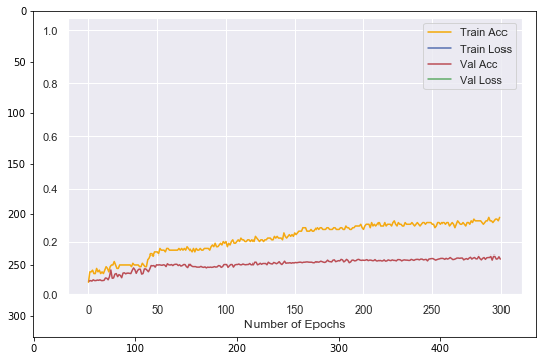

In [21]:
im = plt.imread('LearningPlot2.png')
plt.figure(figsize=(10,6))
plt.imshow(im)
plt.show()

This is under-fitting and not converged. The training accuracy and validation accuracy remains flat regradless of the training which means that the model is not capable to learn from the training data and result in under-fitting. In this situation, the model cannot be converged. 

### Question 2.7
 - Name something that you could do to alleviate problems due to (a) overfitting and (b) underfitting. Provide separate answers for (a) and (b).

a) For overfitting, dropout and regularization is commonly used to increase the generalization of the model. 

b) For underfitting, more training data and more complex model can help the model to better learn the training data well. 

## 3. Main Network Optimisation (50%)

In this section you will undertake the main task of going through the process to find a deep learning solution to this problem that is (within limits) optimised to this specific case.

The following settings for the networks will be fixed:
 - Batch size of 50
 - Maximum number of epochs of 100, but implement *early stopping*
 - Use the *Adam* optimiser
 - Use the *ELU* activation function for all hidden layers (although ReLU is very common, we will explore ELU for this assignment)
 - Use the He Uniform initialization for weights (pass *kernel_initializer="he_uniform"* into the layer specifications)
 - Training/Validation/Testing set sizes are 2500/1000/1000 as described above (with the validation set derived from the original test dataset) unless you needed to reduce the training set size based on your timing tests

You will investigate **both** fully connected and CNN architectures, with the following possibilities:
 - **Number of hidden or Conv2D layers** can be **1, 2 or 3**, but no more (this does *not* count the final dense layer in a CNN)
 - **Number of hidden nodes** (fully connected network) or **number of filters** (in a Conv2D layer of a CNN) can be: **32, 64, 128 or 256** (no other values can be used)
 - A constant **learning rate** should be used (no varying schedules) where the value can be adjusted to be **0.1, 1.0, 10.0 and 100.0** **times the default rate** (these are the only values you can use)
 - CNN architectures will always follow the pattern of Conv2D followed immediately by MaxPooling, with the dense layer following the final Conv2D: e.g. C2-D or C2-MP-C2-D or C2-MP-C2-MP-C2-D (where C2=Conv2D, MP=MaxPooling and D=dense) - note that this is the same pattern used in the code from workshops 8, 9 and 10

Note that the patience setting in the early stopping can be adjusted, but is not considered a "parameter" as such.

A fixed training/validation/test split will be used throughout.

The objective is for you to go through a systematic process for finding a good network that could be adapted to work for other problems. It is the process, rather than the final results, that are more important here (it is not a competition based on results, but an exercise in learning how to approach such problems in a good way). So clearly explain your process, document your code and show appropriate results as you go. In particular, make a summary at the end, in a separate cell, of all the learning rate curves and any other key pieces of information that you used for comparing models and parameter settings.

Remember that the following exploration options exist:
 - Random search through parameter space (noting that here most of the "parameters" are ones that specify the network architecture)
 - Grid search
 - Individual parameter sweeps (varying only one parameter whilst keeping others fixed)
 - These can also be combined together and/or iterated
 
Before writing any code, answer the following two questions and, after that, design and implement your optimisation process to select the "best" network.

### Question 3.1
- What approach will you take to this optimisation?  Summarise your main strategy (or strategies) in a few lines here, pointing out any major advantages or disadvantages.

I will use Random search to this optimisation. Random search approach will randomly select one of the possible combination of hyperparameter setting and test the model performance repeatively. The major advantage is that it does not have to search all the parameter space which save amount of time during the process. But the disadvantage is that the best hyperparameter by random search might not be the best among all the different combination of the hyperparameter.

### Question 3.2
 - When comparing models (either completely different networks or just two networks with different options/parameter settings), what is the best metric to use: accuracy or loss? And should it be calculated on the training set, validation set or test set?  Give reasons for your answer.

Accuracy is the best metric.It should be calculated on the training set, validation set and test set to see if the model is trained well, generalized well and performed well. Accuracy reflects how accurate your model predicts the target with a range of 0 and 1 which gives a very intuitive way to compare the performance while the magnitude of loss can be ranged widely and cannot give a percise measure on how good the model performs. 

### 3.3 Now write the code for this section, and below that, in a separate cell, summarise your results.

!pip install -U keras-tuner

Below I use keras-tuner for hypermeter-tuning. Please use the above command line to install if neccessary.

In [7]:
#build the dense layer model 
class dense_Model(HyperModel):

    def __init__(self, img_size, num_classes):
        self.img_size = img_size
        self.num_classes = num_classes
        self.weights = []

    def build(self, hp):
        model = keras.Sequential()
        model.add(layers.Flatten(input_shape=self.img_size)) # Flatten the input image
        for i in range(hp.Int('num_layers', 1, 3)): # number of layers = 1,2,3
            model.add(layers.Dense(units=hp.Choice(('units_' + str(i)), values=[32,64,128,256]), #number of units
                                   activation='elu',
                                   kernel_initializer=initializers.he_uniform()))
        model.add(layers.Dense(self.num_classes, activation='softmax',kernel_initializer=initializers.he_uniform()))
        model.compile(
            optimizer=keras.optimizers.Adam(
                hp.Choice('learning_rate', [1e-1, 1e-2, 1e-3, 1e-4])), # adam default learning rate = 0.001
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
        self.weights.append(model.get_weights())
        return model

dense_model = dense_Model((28,28),24)


In [9]:
dense_tuner = RandomSearch(
                            dense_model,
                            objective='val_accuracy',
                            max_trials=10, # random search the hyperparameter space for 100 times
                            executions_per_trial=1,
                            directory='dense_dir_3') #create a log directory 
dense_tuner.search_space_summary()

In [10]:
dense_history = dense_tuner.search(  
                    x=X_train_sample,
                    y=y_train_sample,
                    batch_size=50, # batch size
                    epochs=100, # 100 number of epochs
                    validation_data=(X_valid_sample, y_valid_sample),
                    callbacks=[tf.keras.callbacks.EarlyStopping(   #earlystopping with patience = 5
                            monitor='val_accuracy',patience = 5)])




Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 13s - loss: 3.6018 - accuracy: 0.020 - ETA: 0s - loss: 3.2587 - accuracy: 0.078 - 0s 165us/sample - loss: 3.2346 - accuracy: 0.0788 - val_loss: 3.1677 - val_accuracy: 0.0750
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 3.0880 - accuracy: 0.16 - ETA: 0s - loss: 3.0525 - accuracy: 0.12 - 0s 38us/sample - loss: 3.0413 - accuracy: 0.1220 - val_loss: 3.0950 - val_accuracy: 0.0820
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 3.0122 - accuracy: 0.10 - ETA: 0s - loss: 2.9230 - accuracy: 0.16 - 0s 37us/sample - loss: 2.9192 - accuracy: 0.1644 - val_loss: 2.9545 - val_accuracy: 0.1310
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 2.7885 - accuracy: 0.22 - ETA: 0s - loss: 2.8033 - accuracy: 0.21 - 0s 37us/sample - loss: 2.7984 - accuracy: 0.2152 - val_loss: 2.8670 - val_accuracy: 0.1460
Epoch 5/100
2500/250

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 6s - loss: 3.6819 - accuracy: 0.10 - ETA: 0s - loss: 3.9099 - accuracy: 0.04 - 0s 107us/sample - loss: 3.8263 - accuracy: 0.0492 - val_loss: 3.2400 - val_accuracy: 0.0260
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 3.2565 - accuracy: 0.04 - ETA: 0s - loss: 3.1994 - accuracy: 0.04 - 0s 35us/sample - loss: 3.1977 - accuracy: 0.0468 - val_loss: 3.2866 - val_accuracy: 0.0400
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 3.2388 - accuracy: 0.04 - ETA: 0s - loss: 3.2171 - accuracy: 0.05 - 0s 31us/sample - loss: 3.2175 - accuracy: 0.0512 - val_loss: 3.2559 - val_accuracy: 0.0350
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 3.1833 - accuracy: 0.06 - ETA: 0s - loss: 3.2091 - accuracy: 0.03 - 0s 31us/sample - loss: 3.2070 - accuracy: 0.0396 - val_loss: 3.2349 - val_accuracy: 0.0340
Epoch 5/100
2500/2500 [

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 4.8199 - accuracy: 0.04 - ETA: 0s - loss: 4.4863 - accuracy: 0.04 - 0s 130us/sample - loss: 4.2328 - accuracy: 0.0408 - val_loss: 3.2411 - val_accuracy: 0.0350
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 3.1441 - accuracy: 0.12 - ETA: 0s - loss: 3.2086 - accuracy: 0.04 - 0s 36us/sample - loss: 3.2075 - accuracy: 0.0476 - val_loss: 3.3128 - val_accuracy: 0.0230
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 3.2738 - accuracy: 0.06 - ETA: 0s - loss: 3.2158 - accuracy: 0.04 - 0s 36us/sample - loss: 3.2136 - accuracy: 0.0432 - val_loss: 3.2470 - val_accuracy: 0.0180
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 3.2323 - accuracy: 0.02 - ETA: 0s - loss: 3.2049 - accuracy: 0.04 - 0s 40us/sample - loss: 3.2054 - accuracy: 0.0472 - val_loss: 3.2517 - val_accuracy: 0.0390
Epoch 5/100
2500/2500 [

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 7s - loss: 3.7915 - accuracy: 0.06 - ETA: 0s - loss: 91.5685 - accuracy: 0.044 - 0s 119us/sample - loss: 74.8865 - accuracy: 0.0428 - val_loss: 5.9287 - val_accuracy: 0.0180
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 5.5799 - accuracy: 0.06 - ETA: 0s - loss: 4.4028 - accuracy: 0.04 - 0s 40us/sample - loss: 4.3379 - accuracy: 0.0404 - val_loss: 4.0412 - val_accuracy: 0.0450
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 4.0053 - accuracy: 0.02 - ETA: 0s - loss: 3.8392 - accuracy: 0.03 - 0s 34us/sample - loss: 3.8952 - accuracy: 0.0408 - val_loss: 4.5261 - val_accuracy: 0.0370
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 4.9867 - accuracy: 0.02 - ETA: 0s - loss: 4.6463 - accuracy: 0.03 - 0s 35us/sample - loss: 4.7291 - accuracy: 0.0340 - val_loss: 4.6873 - val_accuracy: 0.0430
Epoch 5/100
2500/250

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 6s - loss: 3.8075 - accuracy: 0.02 - ETA: 0s - loss: 38.0973 - accuracy: 0.037 - 0s 106us/sample - loss: 33.2717 - accuracy: 0.0388 - val_loss: 3.7647 - val_accuracy: 0.0230
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 3.5299 - accuracy: 0.10 - ETA: 0s - loss: 3.5052 - accuracy: 0.05 - 0s 35us/sample - loss: 3.5037 - accuracy: 0.0512 - val_loss: 3.4762 - val_accuracy: 0.0620
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 3.4381 - accuracy: 0.08 - ETA: 0s - loss: 3.5214 - accuracy: 0.04 - 0s 31us/sample - loss: 3.5167 - accuracy: 0.0400 - val_loss: 3.3634 - val_accuracy: 0.0460
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 3.3465 - accuracy: 0.08 - ETA: 0s - loss: 3.5266 - accuracy: 0.04 - 0s 31us/sample - loss: 3.5250 - accuracy: 0.0424 - val_loss: 3.8645 - val_accuracy: 0.0460
Epoch 5/100
2500/250

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 3.7865 - accuracy: 0.04 - ETA: 0s - loss: 6.4195 - accuracy: 0.05 - 0s 127us/sample - loss: 5.8497 - accuracy: 0.0516 - val_loss: 3.2191 - val_accuracy: 0.0680
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 3.2940 - accuracy: 0.06 - ETA: 0s - loss: 3.1881 - accuracy: 0.06 - 0s 41us/sample - loss: 3.1659 - accuracy: 0.0720 - val_loss: 3.0845 - val_accuracy: 0.1070
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 3.1042 - accuracy: 0.10 - ETA: 0s - loss: 2.8324 - accuracy: 0.12 - 0s 37us/sample - loss: 2.8207 - accuracy: 0.1288 - val_loss: 2.9337 - val_accuracy: 0.1130
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 2.8532 - accuracy: 0.16 - ETA: 0s - loss: 2.6052 - accuracy: 0.17 - 0s 38us/sample - loss: 2.5908 - accuracy: 0.1716 - val_loss: 2.8248 - val_accuracy: 0.1250
Epoch 5/100
2500/2500 [

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 6s - loss: 3.6530 - accuracy: 0.06 - ETA: 0s - loss: 3.2227 - accuracy: 0.05 - 0s 106us/sample - loss: 3.2052 - accuracy: 0.0640 - val_loss: 3.0871 - val_accuracy: 0.0900
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 2.9863 - accuracy: 0.22 - ETA: 0s - loss: 2.9947 - accuracy: 0.13 - 0s 35us/sample - loss: 2.9896 - accuracy: 0.1404 - val_loss: 2.9654 - val_accuracy: 0.1580
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 2.8983 - accuracy: 0.20 - ETA: 0s - loss: 2.8491 - accuracy: 0.20 - 0s 36us/sample - loss: 2.8430 - accuracy: 0.2044 - val_loss: 2.8758 - val_accuracy: 0.1710
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 2.7032 - accuracy: 0.22 - ETA: 0s - loss: 2.7115 - accuracy: 0.27 - 0s 35us/sample - loss: 2.7102 - accuracy: 0.2716 - val_loss: 2.7539 - val_accuracy: 0.2020
Epoch 5/100
2500/2500 [

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 6s - loss: 3.6171 - accuracy: 0.04 - ETA: 0s - loss: 4.3863 - accuracy: 0.04 - 0s 107us/sample - loss: 4.2216 - accuracy: 0.0488 - val_loss: 3.1586 - val_accuracy: 0.0440
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 3.2802 - accuracy: 0.06 - ETA: 0s - loss: 3.1697 - accuracy: 0.06 - 0s 36us/sample - loss: 3.1623 - accuracy: 0.0628 - val_loss: 3.0793 - val_accuracy: 0.0500
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 2.9570 - accuracy: 0.08 - ETA: 0s - loss: 2.9142 - accuracy: 0.09 - 0s 35us/sample - loss: 2.9068 - accuracy: 0.0916 - val_loss: 2.7577 - val_accuracy: 0.0900
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 2.7377 - accuracy: 0.10 - ETA: 0s - loss: 2.7182 - accuracy: 0.13 - 0s 34us/sample - loss: 2.7143 - accuracy: 0.1336 - val_loss: 2.6401 - val_accuracy: 0.1870
Epoch 5/100
2500/2500 [

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 7s - loss: 3.9614 - accuracy: 0.02 - ETA: 0s - loss: 3.3272 - accuracy: 0.03 - 0s 114us/sample - loss: 3.3087 - accuracy: 0.0428 - val_loss: 3.2015 - val_accuracy: 0.0510
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 3.2070 - accuracy: 0.04 - ETA: 0s - loss: 3.1182 - accuracy: 0.07 - 0s 35us/sample - loss: 3.1117 - accuracy: 0.0820 - val_loss: 3.0876 - val_accuracy: 0.1130
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 3.0198 - accuracy: 0.12 - ETA: 0s - loss: 3.0100 - accuracy: 0.14 - 0s 36us/sample - loss: 3.0075 - accuracy: 0.1416 - val_loss: 2.9917 - val_accuracy: 0.1450
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 2.9046 - accuracy: 0.18 - ETA: 0s - loss: 2.9061 - accuracy: 0.17 - 0s 36us/sample - loss: 2.8987 - accuracy: 0.1796 - val_loss: 2.8713 - val_accuracy: 0.2190
Epoch 5/100
2500/2500 [

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 7s - loss: 3.9428 - accuracy: 0.06 - ETA: 0s - loss: 4.2941 - accuracy: 0.06 - 0s 116us/sample - loss: 4.0867 - accuracy: 0.0664 - val_loss: 3.2073 - val_accuracy: 0.0740
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 3.0566 - accuracy: 0.06 - ETA: 0s - loss: 2.9623 - accuracy: 0.10 - 0s 36us/sample - loss: 2.9552 - accuracy: 0.1052 - val_loss: 2.8154 - val_accuracy: 0.1650
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 2.9935 - accuracy: 0.12 - ETA: 0s - loss: 2.5959 - accuracy: 0.17 - 0s 36us/sample - loss: 2.5818 - accuracy: 0.1824 - val_loss: 2.5725 - val_accuracy: 0.2060
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 2.3633 - accuracy: 0.30 - ETA: 0s - loss: 2.3001 - accuracy: 0.25 - 0s 36us/sample - loss: 2.2909 - accuracy: 0.2600 - val_loss: 2.2533 - val_accuracy: 0.2500
Epoch 5/100
2500/2500 [

INFO:tensorflow:Oracle triggered exit


In [11]:

dense_tuner.results_summary()



In [12]:
# code reference to : https://github.com/keras-team/keras/issues/341#issuecomment-547833394
def reset_weights(model):
    for layer in model.layers:
        if isinstance(layer, tf.keras.Model): #if you're using a model as a layer
            reset_weights(layer) #apply function recursively
            continue

        #where are the initializers?
        if hasattr(layer, 'cell'):
            init_container = layer.cell
        else:
            init_container = layer

        for key, initializer in init_container.__dict__.items():
            if "initializer" not in key: #is this item an initializer?
                  continue #if no, skip it

            # find the corresponding variable, like the kernel or the bias
            if key == 'recurrent_initializer': #special case check
                var = getattr(init_container, 'recurrent_kernel')
            else:
                var = getattr(init_container, key.replace("_initializer", ""))

            var.assign(initializer(var.shape, var.dtype))
            #use the initializer

In [14]:
best_dense_models = dense_tuner.get_best_models(150)
print('This is the best dense model')
print(best_dense_models[0].summary())

best_dense_model = best_dense_models[0]

This is the best dense model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                6168      
Total params: 39,736
Trainable params: 39,736
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
reset_weights(best_dense_model)

In [16]:
history = best_dense_model.fit(x=X_train_sample,
                    y=y_train_sample,
            batch_size=50,
            epochs=100,
            verbose=0,
            validation_data=(X_valid_sample, y_valid_sample))

plot_history(history)

In [24]:
dense_tuner.get_best_hyperparameters()[0]

<tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=1e-04>


In [ ]:
weights = model.get_weights(), model.compile(args), model.fit(args), model.set_weights(weights)

In [51]:
#best_dense_models evaluation

dense_y_pred = best_dense_models[0].predict_classes(X_test_sample[:9])
dense_loss, dense_accuracy = best_dense_models[0].evaluate(X_test_sample, y_test_sample)

1000/1000 [==============================] - ETA: 0s - loss: 0.9954 - accuracy: 0.81 - 0s 39us/sample - loss: 0.9373 - accuracy: 0.7350


In [53]:
print(f'Predicted classes samples:{dense_y_pred[:9]}')   # predicted classes
print(f'True classes samples:     {y_test_sample[:9]}')   # true classes

print(f'Loss of the best dense model:{dense_loss}')
print(f'Accuracy of the best dense model:{dense_accuracy}')

Predicted classes samples:[ 3 20  6  0  4  5  7 23 22]
True classes samples:     [ 3 20  6  0  4 20  7 23 22]
Loss of the best dense model:0.9372580451965332
Accuracy of the best dense model:0.7350000143051147


In [80]:
class CNN_Model(HyperModel):

    def __init__(self, img_size, num_classes):
        self.img_size = img_size
        self.num_classes = num_classes
        self.weight = None

    def build(self, hp):
        #Builds a convolutional model
        inputs = tf.keras.Input(shape = self.img_size)
        x = inputs
        num_layers = hp.Int('conv_layers', 1, 3, default=3) # number of convolution layer = 1,2,3
        for i in range(num_layers):
            x = tf.keras.layers.Conv2D(
                filters=hp.Choice(('filters' + str(i)), values=[32,64,128,256]), #number of filter = 32,64,128,256
                kernel_size= 3,
                strides=1,
                activation='elu',
                padding='same',
                kernel_initializer=initializers.he_uniform())(x)
            if i == num_layers-1: #add maxpooling layer if it is not after the last conv layer
                pass
            else:
                x = tf.keras.layers.MaxPooling2D()(x)
        x = keras.layers.Flatten()(x) # flatten the image before output
        outputs = tf.keras.layers.Dense(self.num_classes, activation='softmax',
                                        kernel_initializer=initializers.he_uniform())(x)
        
        model = tf.keras.Model(inputs, outputs)
        model.compile(
            optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-1,1e-2, 1e-3, 1e-4])),
                                            loss='sparse_categorical_crossentropy',
                                            metrics=['accuracy'])
        self.weight = model.get_weights()
        return model
    
cnn_model = CNN_Model(img_size=(28, 28, 1), num_classes=24)



In [85]:
print(cnn_model.weight)

[array([[[[-0.7829943 , -0.53100145,  0.3920852 , ..., -0.3323829 ,
          -0.10351139,  0.6974466 ]],

        [[ 0.7200149 , -0.52874875, -0.49181536, ...,  0.361879  ,
           0.18376887, -0.6845123 ]],

        [[-0.3450476 , -0.7185736 ,  0.29824257, ..., -0.6858962 ,
          -0.5887917 , -0.80022395]]],


       [[[-0.7563242 , -0.09235537, -0.19487214, ..., -0.61186475,
           0.04026884,  0.714576  ]],

        [[ 0.6928166 ,  0.08126062, -0.809683  , ...,  0.07543248,
          -0.2234323 ,  0.05770719]],

        [[-0.5509479 ,  0.7740047 ,  0.5980178 , ...,  0.45564055,
          -0.22784132,  0.04263598]]],


       [[[-0.08874929, -0.42283574, -0.01608366, ..., -0.3336537 ,
           0.2798916 , -0.39896536]],

        [[ 0.5393264 , -0.6445676 , -0.25936705, ...,  0.18686533,
           0.2601967 , -0.6775434 ]],

        [[ 0.49975646,  0.44754827, -0.12573993, ...,  0.13315135,
          -0.5903966 , -0.11129594]]]], dtype=float32), array([0., 0., 0., 0., 0

In [104]:
cnn_tuner = RandomSearch(
            cnn_model,
            objective='val_accuracy',
            max_trials=20,
            directory='cnn_dir_2') #create a log directory 

cnn_tuner.search_space_summary()

In [105]:
cnn_history = cnn_tuner.search(x=cnn_X_train,
                 y=y_train_sample,
                 batch_size=50, #batch size
                 epochs=100, # 100 number of epochs
                 validation_data=(cnn_X_valid, y_valid_sample),
                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 5)])



Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 9s - loss: 3.5344 - accuracy: 0.04 - ETA: 0s - loss: 2210.7452 - accuracy: 0.044 - ETA: 0s - loss: 2168.0334 - accuracy: 0.043 - 0s 161us/sample - loss: 2078.5018 - accuracy: 0.0428 - val_loss: 1908.5125 - val_accuracy: 0.0320
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1993.7505 - accuracy: 0.040 - ETA: 0s - loss: 1646.7317 - accuracy: 0.032 - ETA: 0s - loss: 1499.1603 - accuracy: 0.038 - 0s 63us/sample - loss: 1440.8880 - accuracy: 0.0376 - val_loss: 1337.7065 - val_accuracy: 0.0180
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 1364.0242 - accuracy: 0.040 - ETA: 0s - loss: 1544.1215 - accuracy: 0.044 - ETA: 0s - loss: 1567.5745 - accuracy: 0.038 - 0s 66us/sample - loss: 1559.6758 - accuracy: 0.0388 - val_loss: 1258.2798 - val_accuracy: 0.0400
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 1186.0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 11s - loss: 3.5460 - accuracy: 0.020 - ETA: 0s - loss: 5.1819 - accuracy: 0.056 - ETA: 0s - loss: 4.0666 - accuracy: 0.12 - ETA: 0s - loss: 3.4073 - accuracy: 0.21 - ETA: 0s - loss: 2.9291 - accuracy: 0.30 - 1s 228us/sample - loss: 2.7550 - accuracy: 0.3356 - val_loss: 1.1090 - val_accuracy: 0.6740
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.1853 - accuracy: 0.68 - ETA: 0s - loss: 0.9306 - accuracy: 0.72 - ETA: 0s - loss: 0.7912 - accuracy: 0.76 - ETA: 0s - loss: 0.7099 - accuracy: 0.79 - ETA: 0s - loss: 0.6664 - accuracy: 0.80 - 0s 118us/sample - loss: 0.6582 - accuracy: 0.8028 - val_loss: 0.7314 - val_accuracy: 0.7540
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3173 - accuracy: 0.94 - ETA: 0s - loss: 0.3770 - accuracy: 0.89 - ETA: 0s - loss: 0.3664 - accuracy: 0.89 - ETA: 0s - loss: 0.3572 - accuracy: 0.90 - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 7s - loss: 3.7287 - accuracy: 0.04 - ETA: 0s - loss: 14.1931 - accuracy: 0.035 - ETA: 0s - loss: 16.2222 - accuracy: 0.055 - ETA: 0s - loss: 15.5295 - accuracy: 0.062 - ETA: 0s - loss: 13.9860 - accuracy: 0.076 - ETA: 0s - loss: 12.4386 - accuracy: 0.082 - ETA: 0s - loss: 11.0130 - accuracy: 0.112 - 1s 260us/sample - loss: 10.5668 - accuracy: 0.1240 - val_loss: 3.4370 - val_accuracy: 0.2310
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 2.5917 - accuracy: 0.38 - ETA: 0s - loss: 2.6190 - accuracy: 0.34 - ETA: 0s - loss: 2.3830 - accuracy: 0.37 - ETA: 0s - loss: 2.2265 - accuracy: 0.40 - ETA: 0s - loss: 2.1692 - accuracy: 0.41 - ETA: 0s - loss: 2.1203 - accuracy: 0.42 - ETA: 0s - loss: 2.0590 - accuracy: 0.43 - 0s 194us/sample - loss: 2.0090 - accuracy: 0.4524 - val_loss: 2.2007 - val_accuracy: 0.4220
Epoch 3/100
2500/2500 [==============================

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 9s - loss: 3.4468 - accuracy: 0.04 - ETA: 0s - loss: 3.2238 - accuracy: 0.05 - ETA: 0s - loss: 3.1443 - accuracy: 0.08 - 0s 152us/sample - loss: 3.1365 - accuracy: 0.0860 - val_loss: 3.0203 - val_accuracy: 0.1590
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 3.0328 - accuracy: 0.18 - ETA: 0s - loss: 2.8671 - accuracy: 0.22 - 0s 57us/sample - loss: 2.7932 - accuracy: 0.2696 - val_loss: 2.7194 - val_accuracy: 0.2820
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 2.6802 - accuracy: 0.34 - ETA: 0s - loss: 2.5501 - accuracy: 0.37 - 0s 56us/sample - loss: 2.4500 - accuracy: 0.4080 - val_loss: 2.3995 - val_accuracy: 0.4410
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 2.3071 - accuracy: 0.40 - ETA: 0s - loss: 2.1755 - accuracy: 0.53 - ETA: 0s - loss: 2.0934 - accuracy: 0.52 - 0s 58us/sample - loss: 2.0821 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 9s - loss: 3.5201 - accuracy: 0.02 - ETA: 0s - loss: 4.0702 - accuracy: 0.11 - ETA: 0s - loss: 3.1287 - accuracy: 0.25 - ETA: 0s - loss: 2.6170 - accuracy: 0.35 - 0s 178us/sample - loss: 2.5908 - accuracy: 0.3548 - val_loss: 1.4873 - val_accuracy: 0.5400
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.1276 - accuracy: 0.66 - ETA: 0s - loss: 0.9002 - accuracy: 0.74 - ETA: 0s - loss: 0.8361 - accuracy: 0.75 - 0s 79us/sample - loss: 0.7856 - accuracy: 0.7744 - val_loss: 0.9928 - val_accuracy: 0.6830
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4351 - accuracy: 0.88 - ETA: 0s - loss: 0.4800 - accuracy: 0.87 - ETA: 0s - loss: 0.4366 - accuracy: 0.88 - 0s 78us/sample - loss: 0.4201 - accuracy: 0.8844 - val_loss: 0.8264 - val_accuracy: 0.7510
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 0.5018 - accur

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 11s - loss: 4.9772 - accuracy: 0.020 - ETA: 1s - loss: 3.7449 - accuracy: 0.050 - ETA: 0s - loss: 3.4724 - accuracy: 0.06 - ETA: 0s - loss: 3.3458 - accuracy: 0.08 - ETA: 0s - loss: 3.2455 - accuracy: 0.10 - ETA: 0s - loss: 3.1753 - accuracy: 0.11 - 1s 252us/sample - loss: 3.1437 - accuracy: 0.1296 - val_loss: 2.7411 - val_accuracy: 0.2530
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 2.7399 - accuracy: 0.14 - ETA: 0s - loss: 2.6844 - accuracy: 0.24 - ETA: 0s - loss: 2.5959 - accuracy: 0.28 - ETA: 0s - loss: 2.5338 - accuracy: 0.31 - ETA: 0s - loss: 2.4816 - accuracy: 0.33 - 0s 134us/sample - loss: 2.4246 - accuracy: 0.3476 - val_loss: 2.3835 - val_accuracy: 0.3170
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 2.1966 - accuracy: 0.36 - ETA: 0s - loss: 2.0632 - accuracy: 0.44 - ETA: 0s - loss: 2.0061 - accuracy: 0.49 - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 10s - loss: 4.1393 - accuracy: 0.0000e+0 - ETA: 1s - loss: 524.7637 - accuracy: 0.0375  - ETA: 0s - loss: 425.3598 - accuracy: 0.03 - ETA: 0s - loss: 536.2331 - accuracy: 0.03 - ETA: 0s - loss: 608.1365 - accuracy: 0.03 - ETA: 0s - loss: 544.9394 - accuracy: 0.03 - ETA: 0s - loss: 497.9897 - accuracy: 0.03 - 1s 290us/sample - loss: 458.5068 - accuracy: 0.0408 - val_loss: 241.3297 - val_accuracy: 0.0660
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 244.5457 - accuracy: 0.10 - ETA: 0s - loss: 193.7456 - accuracy: 0.06 - ETA: 0s - loss: 198.0362 - accuracy: 0.05 - ETA: 0s - loss: 186.3838 - accuracy: 0.06 - ETA: 0s - loss: 178.0511 - accuracy: 0.05 - ETA: 0s - loss: 190.8911 - accuracy: 0.05 - ETA: 0s - loss: 196.7594 - accuracy: 0.05 - 0s 190us/sample - loss: 193.7143 - accuracy: 0.0700 - val_loss: 149.0993 - val_accuracy: 0.1570
Epoch 3/100
2500/2500 [

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 3.8338 - accuracy: 0.10 - ETA: 0s - loss: 2205.5647 - accuracy: 0.040 - ETA: 0s - loss: 2128.4859 - accuracy: 0.040 - 0s 152us/sample - loss: 2074.5138 - accuracy: 0.0404 - val_loss: 2144.0490 - val_accuracy: 0.0460
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 2255.7939 - accuracy: 0.020 - ETA: 0s - loss: 1384.6613 - accuracy: 0.040 - ETA: 0s - loss: 1436.5088 - accuracy: 0.040 - 0s 60us/sample - loss: 1452.0295 - accuracy: 0.0416 - val_loss: 1099.0607 - val_accuracy: 0.0450
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 1157.2914 - accuracy: 0.040 - ETA: 0s - loss: 1339.2576 - accuracy: 0.041 - ETA: 0s - loss: 1234.2355 - accuracy: 0.040 - 0s 64us/sample - loss: 1189.8469 - accuracy: 0.0432 - val_loss: 1110.6695 - val_accuracy: 0.0320
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 893.40

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 3.3253 - accuracy: 0.10 - ETA: 1s - loss: 32559.2551 - accuracy: 0.04 - ETA: 0s - loss: 22509.6945 - accuracy: 0.04 - ETA: 0s - loss: 17711.2579 - accuracy: 0.04 - ETA: 0s - loss: 15757.6792 - accuracy: 0.04 - ETA: 0s - loss: 13709.6939 - accuracy: 0.04 - ETA: 0s - loss: 12371.2338 - accuracy: 0.04 - 1s 250us/sample - loss: 12267.4062 - accuracy: 0.0412 - val_loss: 6108.5275 - val_accuracy: 0.0360
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 5996.9629 - accuracy: 0.040 - ETA: 0s - loss: 5452.3817 - accuracy: 0.035 - ETA: 0s - loss: 4750.0181 - accuracy: 0.048 - ETA: 0s - loss: 4720.6677 - accuracy: 0.050 - ETA: 0s - loss: 5163.1203 - accuracy: 0.050 - ETA: 0s - loss: 5136.5390 - accuracy: 0.048 - ETA: 0s - loss: 5032.3464 - accuracy: 0.049 - 0s 157us/sample - loss: 4994.2757 - accuracy: 0.0496 - val_loss: 3701.2643 - val_accuracy: 0.0240
E

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 3.9106 - accuracy: 0.02 - ETA: 0s - loss: 3.3521 - accuracy: 0.05 - ETA: 0s - loss: 3.1810 - accuracy: 0.08 - 0s 164us/sample - loss: 3.0673 - accuracy: 0.1296 - val_loss: 2.7958 - val_accuracy: 0.2080
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 2.6675 - accuracy: 0.32 - ETA: 0s - loss: 2.5656 - accuracy: 0.33 - ETA: 0s - loss: 2.4456 - accuracy: 0.35 - 0s 80us/sample - loss: 2.3711 - accuracy: 0.3792 - val_loss: 2.2165 - val_accuracy: 0.4780
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 2.0714 - accuracy: 0.58 - ETA: 0s - loss: 1.9666 - accuracy: 0.54 - ETA: 0s - loss: 1.9189 - accuracy: 0.53 - 0s 77us/sample - loss: 1.8552 - accuracy: 0.5464 - val_loss: 1.8482 - val_accuracy: 0.5320
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 1.4825 - accuracy: 0.68 - ETA: 0s - loss: 1.5539 - accur

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 7s - loss: 3.6125 - accuracy: 0.08 - ETA: 0s - loss: 118.6285 - accuracy: 0.06 - ETA: 0s - loss: 143.3442 - accuracy: 0.06 - ETA: 0s - loss: 128.3628 - accuracy: 0.08 - 0s 186us/sample - loss: 105.3596 - accuracy: 0.1044 - val_loss: 23.6558 - val_accuracy: 0.1830
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 17.7196 - accuracy: 0.280 - ETA: 0s - loss: 10.9762 - accuracy: 0.256 - ETA: 0s - loss: 9.1846 - accuracy: 0.320 - ETA: 0s - loss: 7.3148 - accuracy: 0.37 - ETA: 0s - loss: 6.2428 - accuracy: 0.40 - 0s 113us/sample - loss: 6.1711 - accuracy: 0.4112 - val_loss: 4.4334 - val_accuracy: 0.4050
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 2.7310 - accuracy: 0.64 - ETA: 0s - loss: 2.1421 - accuracy: 0.58 - ETA: 0s - loss: 1.8087 - accuracy: 0.62 - ETA: 0s - loss: 1.7238 - accuracy: 0.62 - 0s 112us/sample - loss: 1.6821 - accu

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 10s - loss: 3.9682 - accuracy: 0.040 - ETA: 1s - loss: 26271.7331 - accuracy: 0.02 - ETA: 0s - loss: 14606.6513 - accuracy: 0.04 - ETA: 0s - loss: 10073.1501 - accuracy: 0.04 - ETA: 0s - loss: 7707.9994 - accuracy: 0.0448 - ETA: 0s - loss: 6252.0877 - accuracy: 0.043 - ETA: 0s - loss: 5257.8767 - accuracy: 0.042 - 1s 260us/sample - loss: 5154.7508 - accuracy: 0.0432 - val_loss: 111.7644 - val_accuracy: 0.0580
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 95.3572 - accuracy: 0.060 - ETA: 0s - loss: 111.8327 - accuracy: 0.04 - ETA: 0s - loss: 118.0081 - accuracy: 0.04 - ETA: 0s - loss: 125.2688 - accuracy: 0.04 - ETA: 0s - loss: 127.4836 - accuracy: 0.04 - ETA: 0s - loss: 133.6727 - accuracy: 0.04 - ETA: 0s - loss: 131.9086 - accuracy: 0.04 - 0s 152us/sample - loss: 131.5072 - accuracy: 0.0408 - val_loss: 195.6655 - val_accuracy: 0.0180
Epoch 3/100
2500

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 3.5796 - accuracy: 0.06 - ETA: 1s - loss: 453.6510 - accuracy: 0.06 - ETA: 0s - loss: 382.1192 - accuracy: 0.05 - ETA: 0s - loss: 456.5919 - accuracy: 0.04 - ETA: 0s - loss: 484.7219 - accuracy: 0.04 - ETA: 0s - loss: 471.1744 - accuracy: 0.04 - ETA: 0s - loss: 441.6984 - accuracy: 0.04 - 1s 268us/sample - loss: 407.3901 - accuracy: 0.0432 - val_loss: 216.2034 - val_accuracy: 0.0190
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 245.0350 - accuracy: 0.04 - ETA: 0s - loss: 193.0753 - accuracy: 0.05 - ETA: 0s - loss: 201.6892 - accuracy: 0.06 - ETA: 0s - loss: 202.6578 - accuracy: 0.06 - ETA: 0s - loss: 197.4533 - accuracy: 0.05 - ETA: 0s - loss: 204.7941 - accuracy: 0.06 - ETA: 0s - loss: 218.1616 - accuracy: 0.06 - 0s 187us/sample - loss: 218.7052 - accuracy: 0.0588 - val_loss: 227.3122 - val_accuracy: 0.0570
Epoch 3/100
2500/2500 [=========

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 3.8435 - accuracy: 0.06 - ETA: 0s - loss: 4.3109 - accuracy: 0.06 - ETA: 0s - loss: 4.1197 - accuracy: 0.05 - ETA: 0s - loss: 3.8937 - accuracy: 0.06 - ETA: 0s - loss: 3.6832 - accuracy: 0.09 - ETA: 0s - loss: 3.4691 - accuracy: 0.12 - 1s 226us/sample - loss: 3.3888 - accuracy: 0.1380 - val_loss: 2.3525 - val_accuracy: 0.2980
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 2.0335 - accuracy: 0.44 - ETA: 0s - loss: 2.0562 - accuracy: 0.39 - ETA: 0s - loss: 1.8044 - accuracy: 0.46 - ETA: 0s - loss: 1.6819 - accuracy: 0.49 - ETA: 0s - loss: 1.6079 - accuracy: 0.51 - ETA: 0s - loss: 1.5257 - accuracy: 0.54 - 0s 139us/sample - loss: 1.4997 - accuracy: 0.5508 - val_loss: 1.3884 - val_accuracy: 0.6040
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 0.8059 - accuracy: 0.72 - ETA: 0s - loss: 0.9330 - accuracy: 0.71 - ETA: 0s -

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 10s - loss: 4.2070 - accuracy: 0.040 - ETA: 0s - loss: 3.4004 - accuracy: 0.065 - ETA: 0s - loss: 3.3139 - accuracy: 0.06 - ETA: 0s - loss: 3.2502 - accuracy: 0.06 - ETA: 0s - loss: 3.1974 - accuracy: 0.07 - 1s 226us/sample - loss: 3.1808 - accuracy: 0.0784 - val_loss: 3.0368 - val_accuracy: 0.1030
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 2.9490 - accuracy: 0.12 - ETA: 0s - loss: 2.9313 - accuracy: 0.16 - ETA: 0s - loss: 2.9071 - accuracy: 0.19 - ETA: 0s - loss: 2.8809 - accuracy: 0.18 - ETA: 0s - loss: 2.8381 - accuracy: 0.20 - 0s 117us/sample - loss: 2.8229 - accuracy: 0.2148 - val_loss: 2.7061 - val_accuracy: 0.2610
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 2.5869 - accuracy: 0.32 - ETA: 0s - loss: 2.6114 - accuracy: 0.30 - ETA: 0s - loss: 2.5674 - accuracy: 0.31 - ETA: 0s - loss: 2.5229 - accuracy: 0.33 - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 7s - loss: 3.9293 - accuracy: 0.04 - ETA: 0s - loss: 202.0362 - accuracy: 0.06 - ETA: 0s - loss: 250.2282 - accuracy: 0.05 - ETA: 0s - loss: 291.1776 - accuracy: 0.05 - ETA: 0s - loss: 281.3021 - accuracy: 0.05 - ETA: 0s - loss: 245.8344 - accuracy: 0.05 - ETA: 0s - loss: 222.5442 - accuracy: 0.06 - 1s 260us/sample - loss: 212.6869 - accuracy: 0.0756 - val_loss: 60.0796 - val_accuracy: 0.1740
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 44.2557 - accuracy: 0.180 - ETA: 0s - loss: 40.6734 - accuracy: 0.193 - ETA: 0s - loss: 36.3241 - accuracy: 0.252 - ETA: 0s - loss: 31.5693 - accuracy: 0.293 - ETA: 0s - loss: 26.6541 - accuracy: 0.312 - ETA: 0s - loss: 23.1614 - accuracy: 0.342 - ETA: 0s - loss: 20.7817 - accuracy: 0.365 - 1s 213us/sample - loss: 20.0735 - accuracy: 0.3764 - val_loss: 13.2836 - val_accuracy: 0.3140
Epoch 3/100
2500/2500 [============

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 3.6064 - accuracy: 0.12 - ETA: 0s - loss: 119.2371 - accuracy: 0.04 - ETA: 0s - loss: 95.0747 - accuracy: 0.0698 - 0s 150us/sample - loss: 87.1903 - accuracy: 0.0804 - val_loss: 15.9671 - val_accuracy: 0.2400
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 13.5227 - accuracy: 0.280 - ETA: 0s - loss: 7.2856 - accuracy: 0.389 - ETA: 0s - loss: 4.7652 - accuracy: 0.50 - 0s 65us/sample - loss: 4.4839 - accuracy: 0.5156 - val_loss: 2.0127 - val_accuracy: 0.6080
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3037 - accuracy: 0.90 - ETA: 0s - loss: 1.3027 - accuracy: 0.73 - ETA: 0s - loss: 1.1274 - accuracy: 0.76 - 0s 65us/sample - loss: 1.0516 - accuracy: 0.7768 - val_loss: 1.2833 - val_accuracy: 0.7090
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3691 - accuracy: 0.88 - ETA: 0s - loss: 0.35

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 3.6953 - accuracy: 0.02 - ETA: 0s - loss: 400.0112 - accuracy: 0.04 - ETA: 0s - loss: 674.2078 - accuracy: 0.04 - ETA: 0s - loss: 740.9395 - accuracy: 0.04 - ETA: 0s - loss: 649.1006 - accuracy: 0.04 - 1s 212us/sample - loss: 584.0446 - accuracy: 0.0588 - val_loss: 164.9803 - val_accuracy: 0.1470
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 120.0489 - accuracy: 0.22 - ETA: 0s - loss: 113.7759 - accuracy: 0.19 - ETA: 0s - loss: 97.9228 - accuracy: 0.2524 - ETA: 0s - loss: 77.8731 - accuracy: 0.308 - ETA: 0s - loss: 64.1488 - accuracy: 0.369 - 0s 128us/sample - loss: 55.1601 - accuracy: 0.4176 - val_loss: 19.2370 - val_accuracy: 0.5840
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 16.1596 - accuracy: 0.560 - ETA: 0s - loss: 10.3578 - accuracy: 0.700 - ETA: 0s - loss: 9.8038 - accuracy: 0.707 - ETA: 0s - loss: 9.394

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 7s - loss: 3.9323 - accuracy: 0.04 - ETA: 0s - loss: 199.5514 - accuracy: 0.05 - 0s 130us/sample - loss: 124.5933 - accuracy: 0.0936 - val_loss: 16.6635 - val_accuracy: 0.1910
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 15.5561 - accuracy: 0.280 - ETA: 0s - loss: 7.9818 - accuracy: 0.381 - 0s 56us/sample - loss: 5.7546 - accuracy: 0.4620 - val_loss: 4.5783 - val_accuracy: 0.3950
Epoch 3/100
2500/2500 [==============================] - ETA: 0s - loss: 1.8883 - accuracy: 0.66 - ETA: 0s - loss: 1.3931 - accuracy: 0.70 - 0s 55us/sample - loss: 1.1964 - accuracy: 0.7344 - val_loss: 3.0253 - val_accuracy: 0.5100
Epoch 4/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9167 - accuracy: 0.78 - ETA: 0s - loss: 0.5611 - accuracy: 0.86 - 0s 56us/sample - loss: 0.5233 - accuracy: 0.8608 - val_loss: 2.4337 - val_accuracy: 0.5630
Epoch 5/100
250

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 8s - loss: 3.5728 - accuracy: 0.06 - ETA: 1s - loss: 3.6144 - accuracy: 0.04 - ETA: 0s - loss: 3.4109 - accuracy: 0.07 - ETA: 0s - loss: 3.2779 - accuracy: 0.09 - ETA: 0s - loss: 3.1685 - accuracy: 0.12 - ETA: 0s - loss: 3.0703 - accuracy: 0.15 - ETA: 0s - loss: 2.9665 - accuracy: 0.17 - 1s 274us/sample - loss: 2.8671 - accuracy: 0.2124 - val_loss: 2.3242 - val_accuracy: 0.3820
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.9486 - accuracy: 0.44 - ETA: 0s - loss: 1.9822 - accuracy: 0.47 - ETA: 0s - loss: 1.9113 - accuracy: 0.50 - ETA: 0s - loss: 1.8754 - accuracy: 0.51 - ETA: 0s - loss: 1.8285 - accuracy: 0.52 - ETA: 0s - loss: 1.7910 - accuracy: 0.52 - ETA: 0s - loss: 1.7404 - accuracy: 0.54 - 0s 192us/sample - loss: 1.6915 - accuracy: 0.5572 - val_loss: 1.5144 - val_accuracy: 0.5630
Epoch 3/100
2500/2500 [==============================] - ETA: 0s -

INFO:tensorflow:Oracle triggered exit


In [106]:
cnn_tuner.results_summary()

In [107]:
best_cnn_models = cnn_tuner.get_best_models()
print('This is the best cnn model')
print(best_cnn_models[0].summary())

This is the best cnn model
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       73984     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         295040    
_________________________________________________________________
flatten (Flatten)            (None

In [108]:
best_cnn_model = best_cnn_models[0]

In [109]:
best_cnn_model.set_weights(cnn_model.weight)

In [110]:
cnn_history = best_cnn_model.fit(x=cnn_X_train,
                    y=y_train_sample,
            batch_size=50,
            epochs=100,
            verbose=0,
            validation_data=(cnn_X_valid, y_valid_sample),
                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 5)])

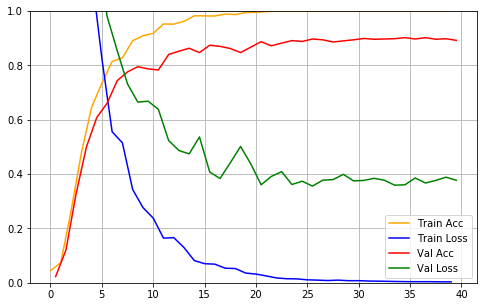

In [111]:

plot_history(cnn_history)

In [32]:
#best_cnn_models evaluation

y_proba_pred = best_cnn_models[0].predict(cnn_X_test[:9])
y_classes_pred = y_proba_pred.argmax(axis=-1)
cnn_loss, cnn_accuracy = best_cnn_models[0].evaluate(cnn_X_test, y_test_sample)

1000/1000 [==============================] - ETA: 2s - loss: 0.6347 - accuracy: 0.90 - ETA: 0s - loss: 0.3761 - accuracy: 0.91 - 0s 181us/sample - loss: 0.3913 - accuracy: 0.9110
[ 3 20  6  0  4 20  7 23 22]
[ 3 20  6  0  4 20  7 23 22]
Loss of the best cnn model:0.391256352186203
Accuracy of the best cnn model:0.9110000133514404


In [50]:
print(f'Predicted classes samples:{y_classes_pred[:9]}')   # predicted classes
print(f'True classes samples:     {y_test_sample[:9]}')   # true classes

print(f'Loss of the best cnn model:{cnn_loss}')
print(f'Accuracy of the best cnn model:{cnn_accuracy}')

Predicted classes samples:[ 3 20  6  0  4 20  7 23 22]
True classes samples:     [ 3 20  6  0  4 20  7 23 22]
Loss of the best cnn model:0.391256352186203
Accuracy of the best cnn model:0.9110000133514404


In [67]:
# Summarise your results here:
# - include learning curves plus anything else you've used for your decisions
# - it is OK if you have also shown these results in the cell above (in fact that is normal)
#    just show the results again here, but next to each other so they are easy to compare
#    side by side

print(f'Test loss of the best dense model:          {dense_loss}')
print(f'Test accuracy of the best dense model:      {dense_accuracy}')
print(f'Validation accuracy of the best dense model:0.7580000162124634')
print('The best dense model summary:')
best_dense_models[0].summary()

print('The dense hyperparameter search summary:')
dense_tuner.results_summary()

Test loss of the best dense model:          0.9372580451965332
Test accuracy of the best dense model:      0.7350000143051147
Validation accuracy of the best dense model:0.7580000162124634
The best dense model summary:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 25)                6425      
Total params: 338,969
Trainable par

In [68]:
print(f'Test loss of the best cnn model:          {cnn_loss}')
print(f'Test accuracy of the best cnn model:      {cnn_accuracy}')
print(f'Validation accuracy of the best dense model:0.9139999747276306')
print('The best cnn model summary:')
best_cnn_models[0].summary()

print('The cnn hyperparameter search summary:')
cnn_tuner.results_summary()


Test loss of the best cnn model:          0.391256352186203
Test accuracy of the best cnn model:      0.9110000133514404
Validation accuracy of the best dense model:0.9139999747276306
The best cnn model summary:
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_______________________________________________

### Question 3.4

Once you have performed your systematic optimisation, choose the best network from all of your results.
- Explain why you chose this particular network.
- Were there one or more other networks with very similar performance?  
- If so, did they share particular design features (e.g. size, number of elements, etc)?

I would choose the best cnn model with the below hyperparameter setting.

Hyperparameters:
|-conv_layers: 3
|-filters0: 128
|-filters1: 128
|-filters2: 128
|-learning_rate: 0.001

It is because this model achieve the highest validation accuracy 0.9139999747276306. 
The second and third best cnn model also achieve a very similar performance. 
Both of them also have 3 convolution layers and with learning rate = 0.001. 

### 3.5 Show Results 
Take the best network and show the confusion matrix for its predictions.

Text(69.0, 0.5, 'True value')

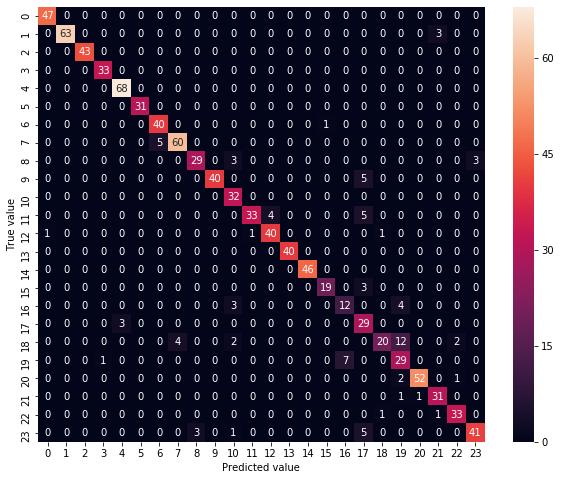

In [35]:
# code here and include plots that show the confusion matrix

y_proba_pred = best_cnn_models[0].predict(cnn_X_test)
y_classes_pred = y_proba_pred.argmax(axis=-1)

plt.figure(figsize = (10,8))
sns.heatmap(tf.math.confusion_matrix(y_test_sample,y_classes_pred), 
            xticklabels=range(0,24), 
            yticklabels=range(0,24),
            annot=True)

plt.xlabel('Predicted value')
plt.ylabel('True value')

### Question 3.6
 - What class is misclassified the most, and what class is it most typically misclassified as?
 - Give the class numbers and show example images of these.

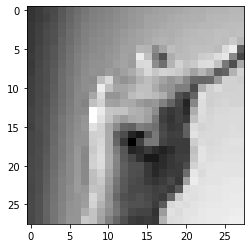

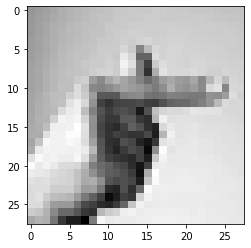

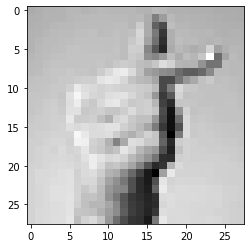

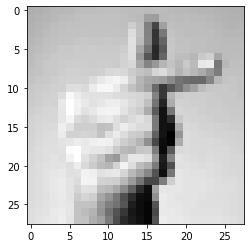

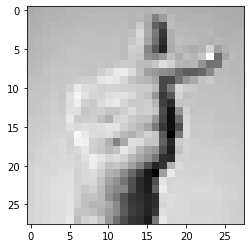

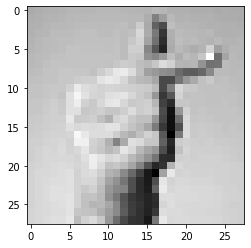

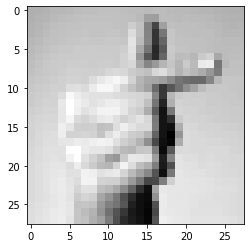

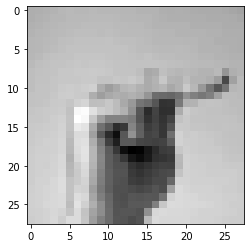

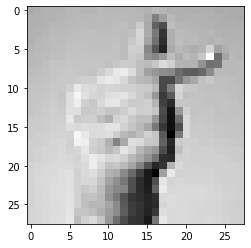

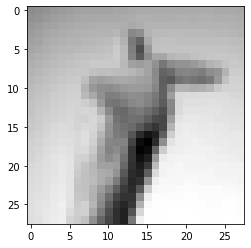

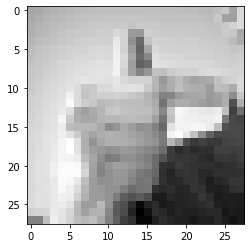

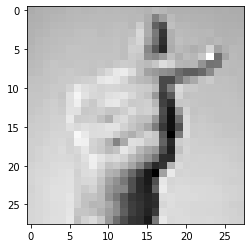

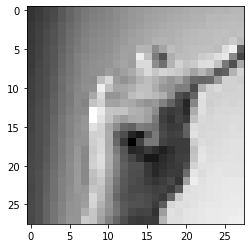

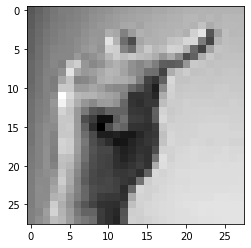

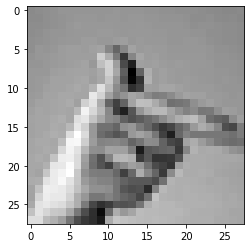

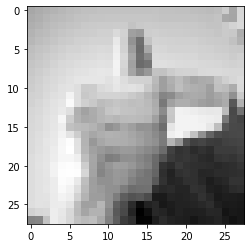

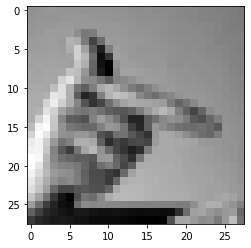

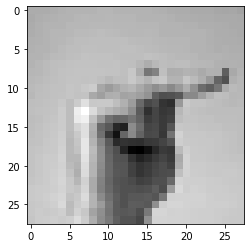

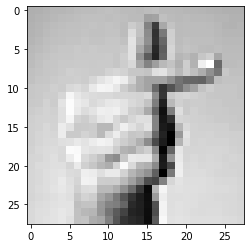

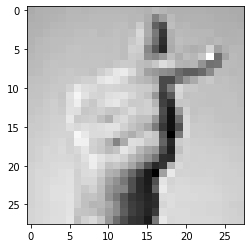

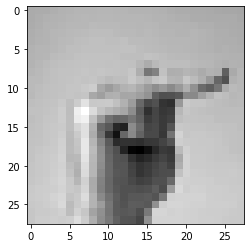

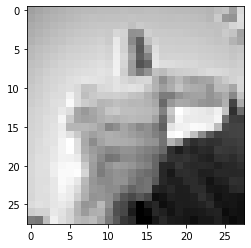

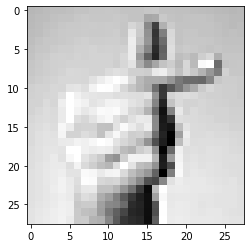

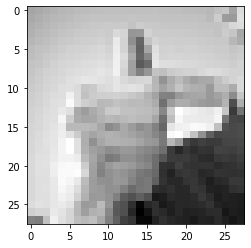

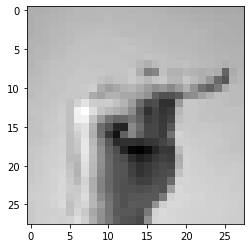

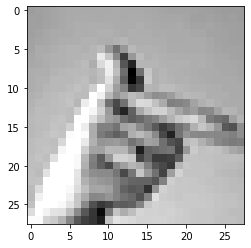

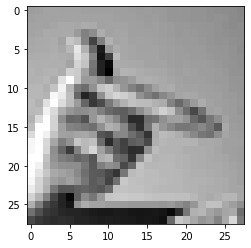

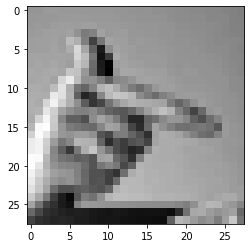

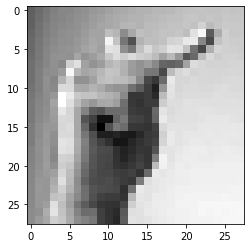

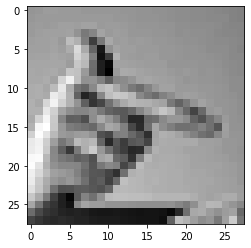

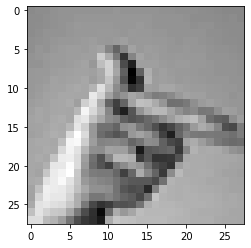

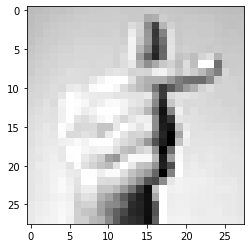

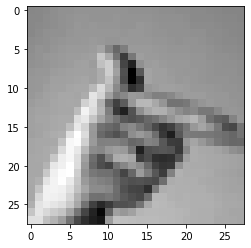

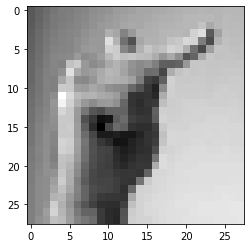

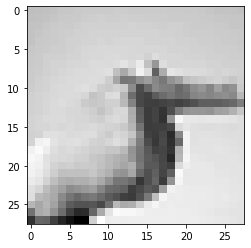

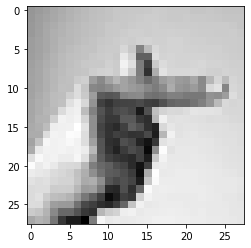

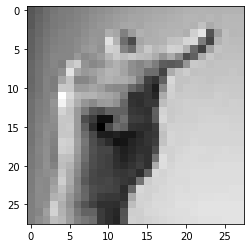

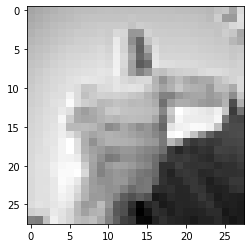

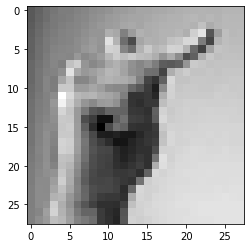

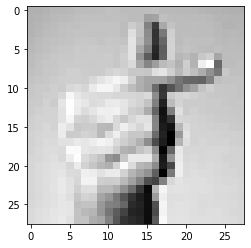

In [36]:
for i in range(len(y_test_sample)): 
    if y_test_sample[i] == 18:
        plt.imshow(X_test_sample[i], cmap='gray')
        plt.grid(False)
        plt.show()


Answer question 3.6 here (text answer to questions - separate from the code above)

Label 18 which is Class 'T' is misclassified the most and class U is most typically misclassified as which has 12 misclassified.

### Question 3.7
 - Summarise (in about 2-3 sentences) what you found out about the tuning and model comparisons that you have done in this section.
 - What aspects (if any) do you think might need to be modified for other problems (e.g. those with much larger datasets)? 

The hyperparameter tuning using Keras-tuner is quite convenient. The model building process and fitting process are easy and straight forward. I found that in this image recognition task, a deeper network normally achieve a better accuracy than a swallow network and a convolution neural network also work better than a dense layer network. In other words, more complex model will a better job in this dataset.

The hyperparameter search space might have to reduce in order to reduce the time complexity if larger datasets or more complex model are used. 

## 4. Free Choice Element (10%)

In this section you can choose to investigate **just one** of the following options for improving the classification performance. Make sure that you explain your process and show appropriate results. Again, the final results are not that important - it is the process that counts.

Options are:
 - Implement new layers such as Dropout and BatchNormalization (see chapter 11 of Géron)
 - Try alternative and deeper CNN layouts, varying the number of Conv2D and MaxPooling layers and their ordering
 - Investigate the effects of larger networks, as well as changing at least one of the following: optimiser, activation function, batch size and/or training set size
 - Create an Ensemble of different networks and investigate the performance
 - Explore a different style of deep learning network (e.g. ResNet - see chapter 14 of Géron)
 
Report your findings and show the final results.

In this part, I will add batchnormalization and dropout layer to the best cnn model. I will try out different dropout rate by using hyperparameter tuning. 

In [40]:
class Final_Model(HyperModel):

    def __init__(self, img_size, num_classes):
        self.img_size = img_size
        self.num_classes = num_classes

    def build(self, hp):
        #Builds a convolutional model
        inputs = tf.keras.Input(shape = self.img_size)
        x = inputs
        num_layers = hp.Choice('conv_layers', values=[3]) # number of convolution layer 3
        for i in range(num_layers):
            x = tf.keras.layers.Conv2D(
                filters=hp.Choice(('filters' + str(i)), values=[128]), #number of filter = 128
                kernel_size= 3,
                strides=1,
                activation='elu',
                padding='same',
                kernel_initializer=initializers.he_uniform())(x)
            
            x = tf.keras.layers.BatchNormalization()(x)
            
            if i == num_layers-1: #add maxpooling layer if it is not after the last conv layer
                pass
            else:
                x = tf.keras.layers.MaxPooling2D()(x)
            
            x = tf.keras.layers.Dropout(rate=hp.Float(
                                                        'dropout'+ str(i),
                                                        min_value=0.0,
                                                        max_value=0.5,
                                                        default=0.2,
                                                        step=0.1))(x)
            
        x = keras.layers.Flatten()(x) # flatten the image before output
        outputs = tf.keras.layers.Dense(self.num_classes, activation='softmax',
                                        kernel_initializer=initializers.he_uniform())(x)
        
        model = tf.keras.Model(inputs, outputs)
        model.compile(
            optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3])),
                                            loss='sparse_categorical_crossentropy',
                                            metrics=['accuracy'])
        return model

final_tuner = RandomSearch(
            Final_Model(img_size=(28, 28, 1), num_classes=24),
            objective='val_accuracy',
            max_trials=100,
            directory='final_dir') #create a log directory 




In [42]:
final_tuner.search_space_summary()

In [43]:
final_tuner.search(x=cnn_X_train,
                 y=y_train_sample,
                 batch_size=50, #batch size
                 epochs=100, # 100 number of epochs
                 validation_data=(cnn_X_valid, y_valid_sample),
                 callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience = 5)])



Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.6993 - accuracy: 0.040 - ETA: 2s - loss: 3.7072 - accuracy: 0.197 - ETA: 1s - loss: 3.0050 - accuracy: 0.28 - ETA: 0s - loss: 2.6075 - accuracy: 0.35 - ETA: 0s - loss: 2.4050 - accuracy: 0.38 - ETA: 0s - loss: 2.2170 - accuracy: 0.42 - ETA: 0s - loss: 2.0412 - accuracy: 0.46 - 1s 350us/sample - loss: 1.8907 - accuracy: 0.4960 - val_loss: 3.0225 - val_accuracy: 0.1940
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6406 - accuracy: 0.80 - ETA: 0s - loss: 0.7439 - accuracy: 0.77 - ETA: 0s - loss: 0.6987 - accuracy: 0.77 - ETA: 0s - loss: 0.6951 - accuracy: 0.77 - ETA: 0s - loss: 0.6257 - accuracy: 0.80 - ETA: 0s - loss: 0.5873 - accuracy: 0.81 - ETA: 0s - loss: 0.5526 - accuracy: 0.82 - 0s 178us/sample - loss: 0.5406 - accuracy: 0.8256 - val_loss: 1.5927 - val_accuracy: 0.4660
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.4127 - accuracy: 0.080 - ETA: 2s - loss: 4.0197 - accuracy: 0.112 - ETA: 1s - loss: 3.5247 - accuracy: 0.18 - ETA: 0s - loss: 3.1822 - accuracy: 0.24 - ETA: 0s - loss: 2.8857 - accuracy: 0.30 - ETA: 0s - loss: 2.6537 - accuracy: 0.33 - ETA: 0s - loss: 2.4366 - accuracy: 0.38 - 1s 338us/sample - loss: 2.2748 - accuracy: 0.4192 - val_loss: 2.6147 - val_accuracy: 0.2650
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9305 - accuracy: 0.68 - ETA: 0s - loss: 0.8868 - accuracy: 0.74 - ETA: 0s - loss: 0.9119 - accuracy: 0.73 - ETA: 0s - loss: 0.9335 - accuracy: 0.72 - ETA: 0s - loss: 0.8586 - accuracy: 0.73 - ETA: 0s - loss: 0.8254 - accuracy: 0.74 - ETA: 0s - loss: 0.7990 - accuracy: 0.75 - 0s 177us/sample - loss: 0.7696 - accuracy: 0.7656 - val_loss: 1.1646 - val_accuracy: 0.6190
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 3.9873 - accuracy: 0.060 - ETA: 1s - loss: 3.8095 - accuracy: 0.215 - ETA: 1s - loss: 3.2014 - accuracy: 0.31 - ETA: 0s - loss: 2.8020 - accuracy: 0.37 - ETA: 0s - loss: 2.3611 - accuracy: 0.45 - ETA: 0s - loss: 2.0492 - accuracy: 0.51 - ETA: 0s - loss: 1.8397 - accuracy: 0.55 - 1s 330us/sample - loss: 1.7257 - accuracy: 0.5804 - val_loss: 2.1600 - val_accuracy: 0.3530
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3726 - accuracy: 0.92 - ETA: 0s - loss: 0.3990 - accuracy: 0.87 - ETA: 0s - loss: 0.4109 - accuracy: 0.86 - ETA: 0s - loss: 0.3834 - accuracy: 0.86 - ETA: 0s - loss: 0.3810 - accuracy: 0.86 - ETA: 0s - loss: 0.3628 - accuracy: 0.87 - ETA: 0s - loss: 0.3714 - accuracy: 0.87 - 0s 174us/sample - loss: 0.3646 - accuracy: 0.8772 - val_loss: 1.1175 - val_accuracy: 0.6600
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.1880 - accuracy: 0.0000e+0 - ETA: 2s - loss: 3.6638 - accuracy: 0.1350    - ETA: 1s - loss: 3.0794 - accuracy: 0.21 - ETA: 0s - loss: 2.7832 - accuracy: 0.28 - ETA: 0s - loss: 2.5484 - accuracy: 0.32 - ETA: 0s - loss: 2.3065 - accuracy: 0.38 - ETA: 0s - loss: 2.1272 - accuracy: 0.42 - 1s 340us/sample - loss: 1.9624 - accuracy: 0.4640 - val_loss: 2.8269 - val_accuracy: 0.2230
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4958 - accuracy: 0.86 - ETA: 0s - loss: 0.8214 - accuracy: 0.73 - ETA: 0s - loss: 0.7602 - accuracy: 0.75 - ETA: 0s - loss: 0.7034 - accuracy: 0.77 - ETA: 0s - loss: 0.7224 - accuracy: 0.77 - ETA: 0s - loss: 0.7055 - accuracy: 0.77 - ETA: 0s - loss: 0.6945 - accuracy: 0.77 - 0s 176us/sample - loss: 0.6632 - accuracy: 0.7876 - val_loss: 1.4274 - val_accuracy: 0.5460
Epoch 3/100
2500/2500 [==============================] 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.4154 - accuracy: 0.040 - ETA: 2s - loss: 3.8164 - accuracy: 0.160 - ETA: 1s - loss: 3.3473 - accuracy: 0.21 - ETA: 0s - loss: 2.8698 - accuracy: 0.29 - ETA: 0s - loss: 2.5687 - accuracy: 0.34 - ETA: 0s - loss: 2.3271 - accuracy: 0.39 - ETA: 0s - loss: 2.1300 - accuracy: 0.43 - 1s 338us/sample - loss: 1.9682 - accuracy: 0.4684 - val_loss: 3.5095 - val_accuracy: 0.1880
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.0492 - accuracy: 0.70 - ETA: 0s - loss: 0.8176 - accuracy: 0.74 - ETA: 0s - loss: 0.7814 - accuracy: 0.75 - ETA: 0s - loss: 0.7354 - accuracy: 0.77 - ETA: 0s - loss: 0.7064 - accuracy: 0.78 - ETA: 0s - loss: 0.6698 - accuracy: 0.79 - ETA: 0s - loss: 0.6483 - accuracy: 0.80 - 0s 177us/sample - loss: 0.6210 - accuracy: 0.8056 - val_loss: 1.4505 - val_accuracy: 0.5160
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.3784 - accuracy: 0.040 - ETA: 2s - loss: 3.9610 - accuracy: 0.120 - ETA: 1s - loss: 3.4897 - accuracy: 0.18 - ETA: 0s - loss: 3.0847 - accuracy: 0.25 - ETA: 0s - loss: 2.8122 - accuracy: 0.30 - ETA: 0s - loss: 2.5493 - accuracy: 0.34 - ETA: 0s - loss: 2.3391 - accuracy: 0.38 - 1s 339us/sample - loss: 2.1595 - accuracy: 0.4288 - val_loss: 2.4665 - val_accuracy: 0.2870
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.3735 - accuracy: 0.66 - ETA: 0s - loss: 0.9203 - accuracy: 0.70 - ETA: 0s - loss: 0.8690 - accuracy: 0.71 - ETA: 0s - loss: 0.8281 - accuracy: 0.73 - ETA: 0s - loss: 0.8007 - accuracy: 0.74 - ETA: 0s - loss: 0.7866 - accuracy: 0.75 - ETA: 0s - loss: 0.7598 - accuracy: 0.75 - 0s 176us/sample - loss: 0.7210 - accuracy: 0.7708 - val_loss: 1.3649 - val_accuracy: 0.5650
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.6995 - accuracy: 0.040 - ETA: 1s - loss: 3.9500 - accuracy: 0.170 - ETA: 0s - loss: 3.3929 - accuracy: 0.23 - ETA: 0s - loss: 2.9039 - accuracy: 0.32 - ETA: 0s - loss: 2.6064 - accuracy: 0.37 - ETA: 0s - loss: 2.2949 - accuracy: 0.43 - ETA: 0s - loss: 2.0977 - accuracy: 0.47 - 1s 329us/sample - loss: 1.9908 - accuracy: 0.4972 - val_loss: 2.1182 - val_accuracy: 0.3590
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4453 - accuracy: 0.84 - ETA: 0s - loss: 0.7106 - accuracy: 0.77 - ETA: 0s - loss: 0.6774 - accuracy: 0.79 - ETA: 0s - loss: 0.6589 - accuracy: 0.79 - ETA: 0s - loss: 0.6195 - accuracy: 0.80 - ETA: 0s - loss: 0.5838 - accuracy: 0.82 - ETA: 0s - loss: 0.5748 - accuracy: 0.82 - 0s 174us/sample - loss: 0.5544 - accuracy: 0.8276 - val_loss: 1.0994 - val_accuracy: 0.6500
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 3.8232 - accuracy: 0.020 - ETA: 1s - loss: 3.3571 - accuracy: 0.205 - ETA: 1s - loss: 2.8082 - accuracy: 0.28 - ETA: 0s - loss: 2.4059 - accuracy: 0.36 - ETA: 0s - loss: 2.0722 - accuracy: 0.43 - ETA: 0s - loss: 1.8629 - accuracy: 0.48 - ETA: 0s - loss: 1.7229 - accuracy: 0.52 - 1s 332us/sample - loss: 1.6347 - accuracy: 0.5444 - val_loss: 2.2213 - val_accuracy: 0.3710
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.5599 - accuracy: 0.82 - ETA: 0s - loss: 0.5370 - accuracy: 0.84 - ETA: 0s - loss: 0.4862 - accuracy: 0.84 - ETA: 0s - loss: 0.4462 - accuracy: 0.85 - ETA: 0s - loss: 0.4288 - accuracy: 0.86 - ETA: 0s - loss: 0.4202 - accuracy: 0.86 - ETA: 0s - loss: 0.4146 - accuracy: 0.87 - 0s 175us/sample - loss: 0.3951 - accuracy: 0.8776 - val_loss: 1.5890 - val_accuracy: 0.5080
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.0157 - accuracy: 0.080 - ETA: 2s - loss: 3.4992 - accuracy: 0.227 - ETA: 1s - loss: 2.8657 - accuracy: 0.31 - ETA: 0s - loss: 2.4248 - accuracy: 0.39 - ETA: 0s - loss: 2.1335 - accuracy: 0.46 - ETA: 0s - loss: 1.9250 - accuracy: 0.50 - ETA: 0s - loss: 1.7394 - accuracy: 0.54 - 1s 338us/sample - loss: 1.5949 - accuracy: 0.5780 - val_loss: 2.2793 - val_accuracy: 0.3370
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3683 - accuracy: 0.88 - ETA: 0s - loss: 0.4790 - accuracy: 0.86 - ETA: 0s - loss: 0.4665 - accuracy: 0.85 - ETA: 0s - loss: 0.4423 - accuracy: 0.86 - ETA: 0s - loss: 0.4205 - accuracy: 0.86 - ETA: 0s - loss: 0.4033 - accuracy: 0.87 - ETA: 0s - loss: 0.3832 - accuracy: 0.87 - 0s 176us/sample - loss: 0.3690 - accuracy: 0.8828 - val_loss: 1.0624 - val_accuracy: 0.6720
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.4772 - accuracy: 0.100 - ETA: 2s - loss: 3.8733 - accuracy: 0.190 - ETA: 1s - loss: 3.2818 - accuracy: 0.24 - ETA: 0s - loss: 2.8858 - accuracy: 0.31 - ETA: 0s - loss: 2.6096 - accuracy: 0.35 - ETA: 0s - loss: 2.3630 - accuracy: 0.40 - ETA: 0s - loss: 2.1919 - accuracy: 0.43 - 1s 338us/sample - loss: 2.0306 - accuracy: 0.4728 - val_loss: 2.6835 - val_accuracy: 0.2430
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.2004 - accuracy: 0.62 - ETA: 0s - loss: 0.8146 - accuracy: 0.75 - ETA: 0s - loss: 0.7361 - accuracy: 0.77 - ETA: 0s - loss: 0.6953 - accuracy: 0.78 - ETA: 0s - loss: 0.6426 - accuracy: 0.79 - ETA: 0s - loss: 0.6211 - accuracy: 0.79 - ETA: 0s - loss: 0.5920 - accuracy: 0.80 - 0s 177us/sample - loss: 0.5945 - accuracy: 0.8096 - val_loss: 1.2177 - val_accuracy: 0.5920
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.3383 - accuracy: 0.040 - ETA: 2s - loss: 3.9616 - accuracy: 0.112 - ETA: 1s - loss: 3.4724 - accuracy: 0.16 - ETA: 0s - loss: 3.1039 - accuracy: 0.23 - ETA: 0s - loss: 2.8421 - accuracy: 0.28 - ETA: 0s - loss: 2.5809 - accuracy: 0.33 - ETA: 0s - loss: 2.4209 - accuracy: 0.37 - 1s 338us/sample - loss: 2.2728 - accuracy: 0.4028 - val_loss: 2.7952 - val_accuracy: 0.3160
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.2349 - accuracy: 0.74 - ETA: 0s - loss: 0.9608 - accuracy: 0.72 - ETA: 0s - loss: 1.0165 - accuracy: 0.70 - ETA: 0s - loss: 0.9275 - accuracy: 0.72 - ETA: 0s - loss: 0.8791 - accuracy: 0.73 - ETA: 0s - loss: 0.8574 - accuracy: 0.73 - ETA: 0s - loss: 0.8170 - accuracy: 0.74 - 0s 176us/sample - loss: 0.7935 - accuracy: 0.7524 - val_loss: 1.5795 - val_accuracy: 0.4950
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 15s - loss: 4.1330 - accuracy: 0.040 - ETA: 1s - loss: 3.5048 - accuracy: 0.167 - ETA: 0s - loss: 2.9875 - accuracy: 0.24 - ETA: 0s - loss: 2.6295 - accuracy: 0.31 - ETA: 0s - loss: 2.3924 - accuracy: 0.36 - ETA: 0s - loss: 2.1547 - accuracy: 0.42 - ETA: 0s - loss: 1.9908 - accuracy: 0.46 - 1s 330us/sample - loss: 1.8342 - accuracy: 0.4980 - val_loss: 2.7998 - val_accuracy: 0.2860
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.8401 - accuracy: 0.74 - ETA: 0s - loss: 0.6720 - accuracy: 0.79 - ETA: 0s - loss: 0.6740 - accuracy: 0.78 - ETA: 0s - loss: 0.6532 - accuracy: 0.79 - ETA: 0s - loss: 0.6501 - accuracy: 0.79 - ETA: 0s - loss: 0.6284 - accuracy: 0.80 - ETA: 0s - loss: 0.6081 - accuracy: 0.80 - 0s 175us/sample - loss: 0.5883 - accuracy: 0.8104 - val_loss: 1.3462 - val_accuracy: 0.5720
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.4859 - accuracy: 0.060 - ETA: 2s - loss: 4.1007 - accuracy: 0.115 - ETA: 1s - loss: 3.4981 - accuracy: 0.18 - ETA: 0s - loss: 3.1948 - accuracy: 0.23 - ETA: 0s - loss: 2.9247 - accuracy: 0.27 - ETA: 0s - loss: 2.6725 - accuracy: 0.32 - ETA: 0s - loss: 2.4778 - accuracy: 0.36 - 1s 339us/sample - loss: 2.3293 - accuracy: 0.3988 - val_loss: 2.0042 - val_accuracy: 0.3980
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.1818 - accuracy: 0.72 - ETA: 0s - loss: 1.0930 - accuracy: 0.67 - ETA: 0s - loss: 0.9251 - accuracy: 0.71 - ETA: 0s - loss: 0.9544 - accuracy: 0.70 - ETA: 0s - loss: 0.9510 - accuracy: 0.71 - ETA: 0s - loss: 0.9131 - accuracy: 0.72 - ETA: 0s - loss: 0.8850 - accuracy: 0.73 - 0s 179us/sample - loss: 0.8523 - accuracy: 0.7428 - val_loss: 1.3322 - val_accuracy: 0.5570
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 5.5171 - accuracy: 0.060 - ETA: 2s - loss: 4.1358 - accuracy: 0.137 - ETA: 1s - loss: 3.4518 - accuracy: 0.21 - ETA: 0s - loss: 3.0477 - accuracy: 0.28 - ETA: 0s - loss: 2.7044 - accuracy: 0.34 - ETA: 0s - loss: 2.4565 - accuracy: 0.38 - ETA: 0s - loss: 2.2391 - accuracy: 0.43 - 1s 335us/sample - loss: 2.1268 - accuracy: 0.4588 - val_loss: 2.4622 - val_accuracy: 0.3170
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.7017 - accuracy: 0.82 - ETA: 0s - loss: 0.8523 - accuracy: 0.72 - ETA: 0s - loss: 0.8135 - accuracy: 0.74 - ETA: 0s - loss: 0.7789 - accuracy: 0.76 - ETA: 0s - loss: 0.7260 - accuracy: 0.77 - ETA: 0s - loss: 0.6893 - accuracy: 0.78 - ETA: 0s - loss: 0.6746 - accuracy: 0.78 - 0s 173us/sample - loss: 0.6667 - accuracy: 0.7928 - val_loss: 1.2030 - val_accuracy: 0.6300
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.2807 - accuracy: 0.080 - ETA: 2s - loss: 3.9430 - accuracy: 0.092 - ETA: 1s - loss: 3.4156 - accuracy: 0.16 - ETA: 0s - loss: 2.9944 - accuracy: 0.24 - ETA: 0s - loss: 2.6663 - accuracy: 0.30 - ETA: 0s - loss: 2.4634 - accuracy: 0.35 - ETA: 0s - loss: 2.2797 - accuracy: 0.39 - 1s 345us/sample - loss: 2.1238 - accuracy: 0.4324 - val_loss: 2.5841 - val_accuracy: 0.2620
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.1379 - accuracy: 0.66 - ETA: 0s - loss: 0.9293 - accuracy: 0.69 - ETA: 0s - loss: 0.8330 - accuracy: 0.73 - ETA: 0s - loss: 0.8273 - accuracy: 0.73 - ETA: 0s - loss: 0.7876 - accuracy: 0.74 - ETA: 0s - loss: 0.7566 - accuracy: 0.75 - ETA: 0s - loss: 0.7360 - accuracy: 0.76 - 0s 175us/sample - loss: 0.7216 - accuracy: 0.7688 - val_loss: 1.3231 - val_accuracy: 0.5830
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.1549 - accuracy: 0.040 - ETA: 2s - loss: 3.3795 - accuracy: 0.182 - ETA: 1s - loss: 2.7897 - accuracy: 0.31 - ETA: 0s - loss: 2.3942 - accuracy: 0.37 - ETA: 0s - loss: 2.1262 - accuracy: 0.43 - ETA: 0s - loss: 1.8844 - accuracy: 0.49 - ETA: 0s - loss: 1.6772 - accuracy: 0.54 - 1s 340us/sample - loss: 1.5121 - accuracy: 0.5820 - val_loss: 2.4488 - val_accuracy: 0.2820
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4791 - accuracy: 0.86 - ETA: 0s - loss: 0.3875 - accuracy: 0.89 - ETA: 0s - loss: 0.3569 - accuracy: 0.88 - ETA: 0s - loss: 0.3204 - accuracy: 0.89 - ETA: 0s - loss: 0.3104 - accuracy: 0.90 - ETA: 0s - loss: 0.2842 - accuracy: 0.91 - ETA: 0s - loss: 0.2706 - accuracy: 0.91 - 0s 176us/sample - loss: 0.2674 - accuracy: 0.9188 - val_loss: 0.9311 - val_accuracy: 0.7070
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.1908 - accuracy: 0.080 - ETA: 2s - loss: 3.5732 - accuracy: 0.167 - ETA: 1s - loss: 3.0927 - accuracy: 0.23 - ETA: 0s - loss: 2.8374 - accuracy: 0.28 - ETA: 0s - loss: 2.6017 - accuracy: 0.33 - ETA: 0s - loss: 2.3792 - accuracy: 0.38 - ETA: 0s - loss: 2.2159 - accuracy: 0.41 - 1s 347us/sample - loss: 2.0616 - accuracy: 0.4488 - val_loss: 2.3633 - val_accuracy: 0.3400
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.1322 - accuracy: 0.68 - ETA: 0s - loss: 0.8152 - accuracy: 0.74 - ETA: 0s - loss: 0.7936 - accuracy: 0.75 - ETA: 0s - loss: 0.7444 - accuracy: 0.76 - ETA: 0s - loss: 0.7480 - accuracy: 0.76 - ETA: 0s - loss: 0.7241 - accuracy: 0.77 - ETA: 0s - loss: 0.7132 - accuracy: 0.77 - 0s 181us/sample - loss: 0.6798 - accuracy: 0.7824 - val_loss: 1.5274 - val_accuracy: 0.5170
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 5.2617 - accuracy: 0.0000e+0 - ETA: 2s - loss: 3.9938 - accuracy: 0.1375    - ETA: 1s - loss: 3.4710 - accuracy: 0.22 - ETA: 0s - loss: 3.1125 - accuracy: 0.27 - ETA: 0s - loss: 2.8193 - accuracy: 0.31 - ETA: 0s - loss: 2.6002 - accuracy: 0.35 - ETA: 0s - loss: 2.3688 - accuracy: 0.40 - 1s 346us/sample - loss: 2.2061 - accuracy: 0.4380 - val_loss: 2.6622 - val_accuracy: 0.3320
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.8310 - accuracy: 0.74 - ETA: 0s - loss: 0.8110 - accuracy: 0.74 - ETA: 0s - loss: 0.8219 - accuracy: 0.73 - ETA: 0s - loss: 0.8405 - accuracy: 0.73 - ETA: 0s - loss: 0.8113 - accuracy: 0.74 - ETA: 0s - loss: 0.7739 - accuracy: 0.75 - ETA: 0s - loss: 0.7598 - accuracy: 0.76 - 0s 182us/sample - loss: 0.7315 - accuracy: 0.7704 - val_loss: 2.6999 - val_accuracy: 0.3410
Epoch 3/100
2500/2500 [==============================] 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.8260 - accuracy: 0.0000e+0 - ETA: 2s - loss: 3.8851 - accuracy: 0.1375    - ETA: 1s - loss: 3.5216 - accuracy: 0.17 - ETA: 0s - loss: 3.1946 - accuracy: 0.22 - ETA: 0s - loss: 2.9087 - accuracy: 0.28 - ETA: 0s - loss: 2.7071 - accuracy: 0.32 - ETA: 0s - loss: 2.5312 - accuracy: 0.35 - 1s 351us/sample - loss: 2.3963 - accuracy: 0.3860 - val_loss: 2.8434 - val_accuracy: 0.2990
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.1162 - accuracy: 0.70 - ETA: 0s - loss: 1.0046 - accuracy: 0.69 - ETA: 0s - loss: 0.9161 - accuracy: 0.71 - ETA: 0s - loss: 0.9443 - accuracy: 0.70 - ETA: 0s - loss: 0.9130 - accuracy: 0.71 - ETA: 0s - loss: 0.9083 - accuracy: 0.71 - ETA: 0s - loss: 0.8887 - accuracy: 0.72 - 0s 178us/sample - loss: 0.8689 - accuracy: 0.7296 - val_loss: 1.4988 - val_accuracy: 0.4760
Epoch 3/100
2500/2500 [==============================] 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.8093 - accuracy: 0.040 - ETA: 2s - loss: 4.0745 - accuracy: 0.132 - ETA: 1s - loss: 3.5449 - accuracy: 0.20 - ETA: 0s - loss: 3.1827 - accuracy: 0.25 - ETA: 0s - loss: 2.8769 - accuracy: 0.31 - ETA: 0s - loss: 2.6223 - accuracy: 0.36 - ETA: 0s - loss: 2.4524 - accuracy: 0.39 - 1s 343us/sample - loss: 2.2685 - accuracy: 0.4392 - val_loss: 1.9113 - val_accuracy: 0.4900
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.1117 - accuracy: 0.64 - ETA: 0s - loss: 0.8947 - accuracy: 0.70 - ETA: 0s - loss: 0.8994 - accuracy: 0.70 - ETA: 0s - loss: 0.8511 - accuracy: 0.73 - ETA: 0s - loss: 0.8319 - accuracy: 0.73 - ETA: 0s - loss: 0.7945 - accuracy: 0.75 - ETA: 0s - loss: 0.7683 - accuracy: 0.76 - 0s 180us/sample - loss: 0.7545 - accuracy: 0.7676 - val_loss: 1.2368 - val_accuracy: 0.6200
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.6668 - accuracy: 0.0000e+0 - ETA: 2s - loss: 3.7771 - accuracy: 0.1475    - ETA: 1s - loss: 3.4212 - accuracy: 0.16 - ETA: 0s - loss: 3.1012 - accuracy: 0.20 - ETA: 0s - loss: 2.8437 - accuracy: 0.26 - ETA: 0s - loss: 2.6149 - accuracy: 0.31 - ETA: 0s - loss: 2.4207 - accuracy: 0.35 - 1s 348us/sample - loss: 2.2579 - accuracy: 0.3932 - val_loss: 2.4312 - val_accuracy: 0.3220
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.4604 - accuracy: 0.64 - ETA: 0s - loss: 1.0142 - accuracy: 0.66 - ETA: 0s - loss: 1.0003 - accuracy: 0.68 - ETA: 0s - loss: 0.9533 - accuracy: 0.69 - ETA: 0s - loss: 0.9437 - accuracy: 0.70 - ETA: 0s - loss: 0.9188 - accuracy: 0.70 - ETA: 0s - loss: 0.8764 - accuracy: 0.72 - 0s 177us/sample - loss: 0.8358 - accuracy: 0.7316 - val_loss: 1.2230 - val_accuracy: 0.5980
Epoch 3/100
2500/2500 [==============================] 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.0910 - accuracy: 0.040 - ETA: 2s - loss: 3.3804 - accuracy: 0.225 - ETA: 1s - loss: 2.8235 - accuracy: 0.32 - ETA: 0s - loss: 2.3791 - accuracy: 0.39 - ETA: 0s - loss: 2.0119 - accuracy: 0.47 - ETA: 0s - loss: 1.7993 - accuracy: 0.52 - ETA: 0s - loss: 1.6303 - accuracy: 0.56 - 1s 340us/sample - loss: 1.5122 - accuracy: 0.5916 - val_loss: 1.9297 - val_accuracy: 0.4090
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3548 - accuracy: 0.88 - ETA: 0s - loss: 0.3407 - accuracy: 0.89 - ETA: 0s - loss: 0.3295 - accuracy: 0.89 - ETA: 0s - loss: 0.3161 - accuracy: 0.89 - ETA: 0s - loss: 0.3197 - accuracy: 0.90 - ETA: 0s - loss: 0.3025 - accuracy: 0.90 - ETA: 0s - loss: 0.3003 - accuracy: 0.90 - 0s 174us/sample - loss: 0.2943 - accuracy: 0.9092 - val_loss: 1.6216 - val_accuracy: 0.4990
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.3017 - accuracy: 0.060 - ETA: 2s - loss: 3.7262 - accuracy: 0.157 - ETA: 1s - loss: 3.0251 - accuracy: 0.27 - ETA: 0s - loss: 2.6752 - accuracy: 0.32 - ETA: 0s - loss: 2.4142 - accuracy: 0.37 - ETA: 0s - loss: 2.2040 - accuracy: 0.41 - ETA: 0s - loss: 2.0210 - accuracy: 0.45 - 1s 347us/sample - loss: 1.8596 - accuracy: 0.4928 - val_loss: 2.2862 - val_accuracy: 0.3230
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.5841 - accuracy: 0.78 - ETA: 0s - loss: 0.7005 - accuracy: 0.78 - ETA: 0s - loss: 0.7100 - accuracy: 0.77 - ETA: 0s - loss: 0.6696 - accuracy: 0.78 - ETA: 0s - loss: 0.6392 - accuracy: 0.79 - ETA: 0s - loss: 0.6024 - accuracy: 0.80 - ETA: 0s - loss: 0.5726 - accuracy: 0.81 - 0s 178us/sample - loss: 0.5461 - accuracy: 0.8244 - val_loss: 1.1696 - val_accuracy: 0.5910
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 3.7133 - accuracy: 0.040 - ETA: 2s - loss: 3.3316 - accuracy: 0.185 - ETA: 1s - loss: 2.8103 - accuracy: 0.29 - ETA: 0s - loss: 2.4313 - accuracy: 0.36 - ETA: 0s - loss: 2.1454 - accuracy: 0.42 - ETA: 0s - loss: 1.9193 - accuracy: 0.47 - ETA: 0s - loss: 1.7556 - accuracy: 0.51 - 1s 339us/sample - loss: 1.6005 - accuracy: 0.5548 - val_loss: 1.8996 - val_accuracy: 0.4780
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4363 - accuracy: 0.82 - ETA: 0s - loss: 0.4620 - accuracy: 0.85 - ETA: 0s - loss: 0.4780 - accuracy: 0.85 - ETA: 0s - loss: 0.4479 - accuracy: 0.86 - ETA: 0s - loss: 0.4393 - accuracy: 0.86 - ETA: 0s - loss: 0.4233 - accuracy: 0.86 - ETA: 0s - loss: 0.4079 - accuracy: 0.87 - 0s 176us/sample - loss: 0.3881 - accuracy: 0.8776 - val_loss: 1.2534 - val_accuracy: 0.6310
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.2780 - accuracy: 0.040 - ETA: 2s - loss: 3.4871 - accuracy: 0.165 - ETA: 1s - loss: 2.9633 - accuracy: 0.22 - ETA: 0s - loss: 2.6183 - accuracy: 0.30 - ETA: 0s - loss: 2.3540 - accuracy: 0.36 - ETA: 0s - loss: 2.1221 - accuracy: 0.41 - ETA: 0s - loss: 1.9385 - accuracy: 0.45 - 1s 329us/sample - loss: 1.8374 - accuracy: 0.4808 - val_loss: 2.4334 - val_accuracy: 0.3200
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.8248 - accuracy: 0.74 - ETA: 0s - loss: 0.6800 - accuracy: 0.76 - ETA: 0s - loss: 0.6523 - accuracy: 0.77 - ETA: 0s - loss: 0.6232 - accuracy: 0.77 - ETA: 0s - loss: 0.6043 - accuracy: 0.79 - ETA: 0s - loss: 0.5934 - accuracy: 0.79 - ETA: 0s - loss: 0.5721 - accuracy: 0.80 - 0s 175us/sample - loss: 0.5645 - accuracy: 0.8068 - val_loss: 1.6112 - val_accuracy: 0.4710
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.0125 - accuracy: 0.060 - ETA: 2s - loss: 3.7057 - accuracy: 0.127 - ETA: 1s - loss: 3.1128 - accuracy: 0.22 - ETA: 0s - loss: 2.6657 - accuracy: 0.31 - ETA: 0s - loss: 2.3794 - accuracy: 0.37 - ETA: 0s - loss: 2.1558 - accuracy: 0.41 - ETA: 0s - loss: 1.9905 - accuracy: 0.46 - 1s 338us/sample - loss: 1.8273 - accuracy: 0.5024 - val_loss: 3.2009 - val_accuracy: 0.2780
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6480 - accuracy: 0.78 - ETA: 0s - loss: 0.6316 - accuracy: 0.79 - ETA: 0s - loss: 0.5762 - accuracy: 0.81 - ETA: 0s - loss: 0.5989 - accuracy: 0.80 - ETA: 0s - loss: 0.5933 - accuracy: 0.81 - ETA: 0s - loss: 0.5783 - accuracy: 0.81 - ETA: 0s - loss: 0.5514 - accuracy: 0.82 - 0s 176us/sample - loss: 0.5392 - accuracy: 0.8280 - val_loss: 1.1421 - val_accuracy: 0.6330
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.0708 - accuracy: 0.040 - ETA: 2s - loss: 3.6353 - accuracy: 0.185 - ETA: 1s - loss: 3.0529 - accuracy: 0.28 - ETA: 0s - loss: 2.6853 - accuracy: 0.35 - ETA: 0s - loss: 2.3844 - accuracy: 0.41 - ETA: 0s - loss: 2.1548 - accuracy: 0.45 - ETA: 0s - loss: 1.9698 - accuracy: 0.49 - 1s 338us/sample - loss: 1.8100 - accuracy: 0.5272 - val_loss: 2.3848 - val_accuracy: 0.3220
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.3036 - accuracy: 0.70 - ETA: 0s - loss: 0.7231 - accuracy: 0.78 - ETA: 0s - loss: 0.6190 - accuracy: 0.81 - ETA: 0s - loss: 0.5718 - accuracy: 0.82 - ETA: 0s - loss: 0.5408 - accuracy: 0.83 - ETA: 0s - loss: 0.5111 - accuracy: 0.83 - ETA: 0s - loss: 0.4878 - accuracy: 0.84 - 0s 177us/sample - loss: 0.4648 - accuracy: 0.8508 - val_loss: 0.9686 - val_accuracy: 0.6920
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.2689 - accuracy: 0.0000e+0 - ETA: 2s - loss: 3.8337 - accuracy: 0.1100    - ETA: 1s - loss: 3.2274 - accuracy: 0.18 - ETA: 0s - loss: 2.8784 - accuracy: 0.25 - ETA: 0s - loss: 2.5945 - accuracy: 0.32 - ETA: 0s - loss: 2.3795 - accuracy: 0.37 - ETA: 0s - loss: 2.1645 - accuracy: 0.41 - 1s 339us/sample - loss: 2.0094 - accuracy: 0.4492 - val_loss: 2.3074 - val_accuracy: 0.3460
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6605 - accuracy: 0.78 - ETA: 0s - loss: 0.8185 - accuracy: 0.74 - ETA: 0s - loss: 0.7776 - accuracy: 0.76 - ETA: 0s - loss: 0.7225 - accuracy: 0.77 - ETA: 0s - loss: 0.6768 - accuracy: 0.78 - ETA: 0s - loss: 0.6474 - accuracy: 0.79 - ETA: 0s - loss: 0.6220 - accuracy: 0.80 - 0s 176us/sample - loss: 0.6074 - accuracy: 0.8092 - val_loss: 1.3184 - val_accuracy: 0.5530
Epoch 3/100
2500/2500 [==============================] 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.6462 - accuracy: 0.080 - ETA: 2s - loss: 4.2353 - accuracy: 0.162 - ETA: 1s - loss: 3.5246 - accuracy: 0.23 - ETA: 0s - loss: 2.9703 - accuracy: 0.31 - ETA: 0s - loss: 2.6550 - accuracy: 0.37 - ETA: 0s - loss: 2.3768 - accuracy: 0.41 - ETA: 0s - loss: 2.1838 - accuracy: 0.45 - 1s 343us/sample - loss: 2.0278 - accuracy: 0.4908 - val_loss: 2.0594 - val_accuracy: 0.3910
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9079 - accuracy: 0.76 - ETA: 0s - loss: 0.7157 - accuracy: 0.78 - ETA: 0s - loss: 0.7266 - accuracy: 0.77 - ETA: 0s - loss: 0.7215 - accuracy: 0.78 - ETA: 0s - loss: 0.7123 - accuracy: 0.78 - ETA: 0s - loss: 0.6765 - accuracy: 0.79 - ETA: 0s - loss: 0.6530 - accuracy: 0.79 - 0s 177us/sample - loss: 0.6307 - accuracy: 0.8028 - val_loss: 1.3055 - val_accuracy: 0.5700
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 3.8366 - accuracy: 0.080 - ETA: 1s - loss: 3.3073 - accuracy: 0.182 - ETA: 1s - loss: 2.8776 - accuracy: 0.24 - ETA: 0s - loss: 2.4675 - accuracy: 0.32 - ETA: 0s - loss: 2.2118 - accuracy: 0.38 - ETA: 0s - loss: 1.9745 - accuracy: 0.44 - ETA: 0s - loss: 1.8113 - accuracy: 0.48 - 1s 329us/sample - loss: 1.7613 - accuracy: 0.4940 - val_loss: 2.2968 - val_accuracy: 0.3640
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6641 - accuracy: 0.80 - ETA: 0s - loss: 0.5986 - accuracy: 0.79 - ETA: 0s - loss: 0.5422 - accuracy: 0.81 - ETA: 0s - loss: 0.5596 - accuracy: 0.81 - ETA: 0s - loss: 0.5816 - accuracy: 0.80 - ETA: 0s - loss: 0.5628 - accuracy: 0.81 - ETA: 0s - loss: 0.5288 - accuracy: 0.82 - 0s 175us/sample - loss: 0.5063 - accuracy: 0.8344 - val_loss: 1.1249 - val_accuracy: 0.6380
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.5558 - accuracy: 0.020 - ETA: 2s - loss: 3.8890 - accuracy: 0.180 - ETA: 1s - loss: 3.0941 - accuracy: 0.28 - ETA: 0s - loss: 2.6798 - accuracy: 0.36 - ETA: 0s - loss: 2.3060 - accuracy: 0.43 - ETA: 0s - loss: 1.9737 - accuracy: 0.50 - ETA: 0s - loss: 1.7719 - accuracy: 0.54 - 1s 332us/sample - loss: 1.6239 - accuracy: 0.5816 - val_loss: 2.2386 - val_accuracy: 0.4040
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6287 - accuracy: 0.76 - ETA: 0s - loss: 0.4548 - accuracy: 0.85 - ETA: 0s - loss: 0.3938 - accuracy: 0.86 - ETA: 0s - loss: 0.3695 - accuracy: 0.87 - ETA: 0s - loss: 0.3687 - accuracy: 0.87 - ETA: 0s - loss: 0.3715 - accuracy: 0.88 - ETA: 0s - loss: 0.3664 - accuracy: 0.88 - 0s 176us/sample - loss: 0.3586 - accuracy: 0.8896 - val_loss: 1.4443 - val_accuracy: 0.5670
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 15s - loss: 4.2622 - accuracy: 0.060 - ETA: 1s - loss: 3.3939 - accuracy: 0.264 - ETA: 0s - loss: 2.8430 - accuracy: 0.33 - ETA: 0s - loss: 2.3367 - accuracy: 0.42 - ETA: 0s - loss: 2.0001 - accuracy: 0.49 - ETA: 0s - loss: 1.7611 - accuracy: 0.55 - ETA: 0s - loss: 1.5694 - accuracy: 0.59 - 1s 320us/sample - loss: 1.5432 - accuracy: 0.5992 - val_loss: 2.2724 - val_accuracy: 0.3300
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.92 - ETA: 0s - loss: 0.3031 - accuracy: 0.90 - ETA: 0s - loss: 0.2993 - accuracy: 0.90 - ETA: 0s - loss: 0.2746 - accuracy: 0.91 - ETA: 0s - loss: 0.2581 - accuracy: 0.92 - ETA: 0s - loss: 0.2332 - accuracy: 0.92 - ETA: 0s - loss: 0.2222 - accuracy: 0.92 - 0s 170us/sample - loss: 0.2197 - accuracy: 0.9304 - val_loss: 1.4282 - val_accuracy: 0.5390
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.1504 - accuracy: 0.060 - ETA: 2s - loss: 3.8695 - accuracy: 0.145 - ETA: 1s - loss: 3.4525 - accuracy: 0.19 - ETA: 0s - loss: 3.0419 - accuracy: 0.24 - ETA: 0s - loss: 2.7562 - accuracy: 0.29 - ETA: 0s - loss: 2.5203 - accuracy: 0.34 - ETA: 0s - loss: 2.3302 - accuracy: 0.38 - 1s 340us/sample - loss: 2.1721 - accuracy: 0.4152 - val_loss: 3.0393 - val_accuracy: 0.2480
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9383 - accuracy: 0.72 - ETA: 0s - loss: 0.8586 - accuracy: 0.73 - ETA: 0s - loss: 0.8194 - accuracy: 0.73 - ETA: 0s - loss: 0.7770 - accuracy: 0.74 - ETA: 0s - loss: 0.7607 - accuracy: 0.75 - ETA: 0s - loss: 0.7356 - accuracy: 0.76 - ETA: 0s - loss: 0.7234 - accuracy: 0.76 - 0s 176us/sample - loss: 0.6944 - accuracy: 0.7712 - val_loss: 1.2500 - val_accuracy: 0.5880
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 15s - loss: 4.3635 - accuracy: 0.020 - ETA: 1s - loss: 3.8960 - accuracy: 0.171 - ETA: 0s - loss: 3.1835 - accuracy: 0.26 - ETA: 0s - loss: 2.7962 - accuracy: 0.32 - ETA: 0s - loss: 2.4290 - accuracy: 0.39 - ETA: 0s - loss: 2.1875 - accuracy: 0.44 - ETA: 0s - loss: 1.9939 - accuracy: 0.48 - 1s 323us/sample - loss: 1.9798 - accuracy: 0.4888 - val_loss: 2.8648 - val_accuracy: 0.2400
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.0759 - accuracy: 0.78 - ETA: 0s - loss: 0.7264 - accuracy: 0.77 - ETA: 0s - loss: 0.6844 - accuracy: 0.78 - ETA: 0s - loss: 0.6484 - accuracy: 0.79 - ETA: 0s - loss: 0.6175 - accuracy: 0.80 - ETA: 0s - loss: 0.5834 - accuracy: 0.81 - ETA: 0s - loss: 0.5508 - accuracy: 0.82 - 0s 169us/sample - loss: 0.5457 - accuracy: 0.8240 - val_loss: 1.1991 - val_accuracy: 0.6030
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.9499 - accuracy: 0.020 - ETA: 2s - loss: 4.5248 - accuracy: 0.085 - ETA: 1s - loss: 4.0729 - accuracy: 0.13 - ETA: 0s - loss: 3.6758 - accuracy: 0.17 - ETA: 0s - loss: 3.4180 - accuracy: 0.20 - ETA: 0s - loss: 3.2075 - accuracy: 0.24 - ETA: 0s - loss: 3.0116 - accuracy: 0.27 - 1s 337us/sample - loss: 2.8765 - accuracy: 0.3048 - val_loss: 3.2776 - val_accuracy: 0.2440
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 2.1074 - accuracy: 0.38 - ETA: 0s - loss: 1.4987 - accuracy: 0.57 - ETA: 0s - loss: 1.4509 - accuracy: 0.57 - ETA: 0s - loss: 1.4069 - accuracy: 0.58 - ETA: 0s - loss: 1.4060 - accuracy: 0.58 - ETA: 0s - loss: 1.3423 - accuracy: 0.60 - ETA: 0s - loss: 1.2883 - accuracy: 0.62 - 0s 176us/sample - loss: 1.2458 - accuracy: 0.6324 - val_loss: 1.5276 - val_accuracy: 0.5100
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.0855 - accuracy: 0.020 - ETA: 2s - loss: 3.5666 - accuracy: 0.145 - ETA: 1s - loss: 3.0060 - accuracy: 0.24 - ETA: 0s - loss: 2.6583 - accuracy: 0.31 - ETA: 0s - loss: 2.3756 - accuracy: 0.37 - ETA: 0s - loss: 2.1007 - accuracy: 0.43 - ETA: 0s - loss: 1.8919 - accuracy: 0.48 - 1s 342us/sample - loss: 1.7996 - accuracy: 0.5060 - val_loss: 3.4165 - val_accuracy: 0.1660
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9105 - accuracy: 0.72 - ETA: 0s - loss: 0.6634 - accuracy: 0.78 - ETA: 0s - loss: 0.6790 - accuracy: 0.78 - ETA: 0s - loss: 0.6588 - accuracy: 0.78 - ETA: 0s - loss: 0.5933 - accuracy: 0.80 - ETA: 0s - loss: 0.5776 - accuracy: 0.81 - ETA: 0s - loss: 0.5611 - accuracy: 0.81 - 0s 173us/sample - loss: 0.5543 - accuracy: 0.8196 - val_loss: 1.4716 - val_accuracy: 0.5340
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.6318 - accuracy: 0.020 - ETA: 2s - loss: 3.6141 - accuracy: 0.137 - ETA: 0s - loss: 3.0522 - accuracy: 0.24 - ETA: 0s - loss: 2.6691 - accuracy: 0.32 - ETA: 0s - loss: 2.3887 - accuracy: 0.37 - ETA: 0s - loss: 2.1258 - accuracy: 0.43 - ETA: 0s - loss: 1.9388 - accuracy: 0.47 - 1s 330us/sample - loss: 1.8936 - accuracy: 0.4880 - val_loss: 2.1663 - val_accuracy: 0.3690
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.7561 - accuracy: 0.78 - ETA: 0s - loss: 0.6741 - accuracy: 0.80 - ETA: 0s - loss: 0.6432 - accuracy: 0.80 - ETA: 0s - loss: 0.6225 - accuracy: 0.80 - ETA: 0s - loss: 0.5884 - accuracy: 0.81 - ETA: 0s - loss: 0.5633 - accuracy: 0.81 - ETA: 0s - loss: 0.5486 - accuracy: 0.82 - 0s 173us/sample - loss: 0.5339 - accuracy: 0.8296 - val_loss: 1.4239 - val_accuracy: 0.5520
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.6522 - accuracy: 0.060 - ETA: 1s - loss: 3.9691 - accuracy: 0.164 - ETA: 0s - loss: 3.2845 - accuracy: 0.25 - ETA: 0s - loss: 2.8831 - accuracy: 0.30 - ETA: 0s - loss: 2.5990 - accuracy: 0.35 - ETA: 0s - loss: 2.3497 - accuracy: 0.40 - ETA: 0s - loss: 2.1531 - accuracy: 0.45 - 1s 333us/sample - loss: 2.1006 - accuracy: 0.4604 - val_loss: 2.1162 - val_accuracy: 0.3810
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4854 - accuracy: 0.88 - ETA: 0s - loss: 0.8206 - accuracy: 0.76 - ETA: 0s - loss: 0.7933 - accuracy: 0.77 - ETA: 0s - loss: 0.7384 - accuracy: 0.78 - ETA: 0s - loss: 0.7252 - accuracy: 0.78 - ETA: 0s - loss: 0.6851 - accuracy: 0.80 - ETA: 0s - loss: 0.6712 - accuracy: 0.80 - 0s 173us/sample - loss: 0.6609 - accuracy: 0.8040 - val_loss: 1.1986 - val_accuracy: 0.6320
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.4459 - accuracy: 0.040 - ETA: 1s - loss: 3.7124 - accuracy: 0.146 - ETA: 0s - loss: 3.0559 - accuracy: 0.24 - ETA: 0s - loss: 2.6789 - accuracy: 0.31 - ETA: 0s - loss: 2.3292 - accuracy: 0.38 - ETA: 0s - loss: 2.1086 - accuracy: 0.43 - ETA: 0s - loss: 1.9219 - accuracy: 0.47 - 1s 334us/sample - loss: 1.8820 - accuracy: 0.4828 - val_loss: 2.1322 - val_accuracy: 0.3350
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.5793 - accuracy: 0.80 - ETA: 0s - loss: 0.6890 - accuracy: 0.79 - ETA: 0s - loss: 0.6384 - accuracy: 0.79 - ETA: 0s - loss: 0.6200 - accuracy: 0.80 - ETA: 0s - loss: 0.6062 - accuracy: 0.81 - ETA: 0s - loss: 0.5696 - accuracy: 0.81 - ETA: 0s - loss: 0.5427 - accuracy: 0.82 - 0s 174us/sample - loss: 0.5395 - accuracy: 0.8260 - val_loss: 1.2845 - val_accuracy: 0.5670
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.2505 - accuracy: 0.020 - ETA: 1s - loss: 3.4321 - accuracy: 0.162 - ETA: 0s - loss: 2.7325 - accuracy: 0.30 - ETA: 0s - loss: 2.3560 - accuracy: 0.37 - ETA: 0s - loss: 2.0978 - accuracy: 0.43 - ETA: 0s - loss: 1.8342 - accuracy: 0.49 - ETA: 0s - loss: 1.6577 - accuracy: 0.53 - 1s 331us/sample - loss: 1.6090 - accuracy: 0.5452 - val_loss: 1.5592 - val_accuracy: 0.4840
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3670 - accuracy: 0.84 - ETA: 0s - loss: 0.4687 - accuracy: 0.85 - ETA: 0s - loss: 0.4906 - accuracy: 0.84 - ETA: 0s - loss: 0.5033 - accuracy: 0.84 - ETA: 0s - loss: 0.4843 - accuracy: 0.84 - ETA: 0s - loss: 0.4764 - accuracy: 0.84 - ETA: 0s - loss: 0.4586 - accuracy: 0.85 - 0s 172us/sample - loss: 0.4567 - accuracy: 0.8544 - val_loss: 1.5345 - val_accuracy: 0.4950
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.4804 - accuracy: 0.020 - ETA: 2s - loss: 3.9855 - accuracy: 0.132 - ETA: 0s - loss: 3.2285 - accuracy: 0.22 - ETA: 0s - loss: 2.8704 - accuracy: 0.28 - ETA: 0s - loss: 2.6299 - accuracy: 0.33 - ETA: 0s - loss: 2.3859 - accuracy: 0.38 - ETA: 0s - loss: 2.2017 - accuracy: 0.43 - 1s 332us/sample - loss: 2.1362 - accuracy: 0.4484 - val_loss: 2.3642 - val_accuracy: 0.3490
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.7275 - accuracy: 0.82 - ETA: 0s - loss: 0.8791 - accuracy: 0.72 - ETA: 0s - loss: 0.7888 - accuracy: 0.75 - ETA: 0s - loss: 0.7730 - accuracy: 0.74 - ETA: 0s - loss: 0.7521 - accuracy: 0.76 - ETA: 0s - loss: 0.7399 - accuracy: 0.76 - ETA: 0s - loss: 0.7149 - accuracy: 0.77 - 0s 173us/sample - loss: 0.7039 - accuracy: 0.7764 - val_loss: 1.3132 - val_accuracy: 0.6030
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 15s - loss: 3.6187 - accuracy: 0.100 - ETA: 1s - loss: 3.4432 - accuracy: 0.257 - ETA: 0s - loss: 2.7013 - accuracy: 0.36 - ETA: 0s - loss: 2.1803 - accuracy: 0.46 - ETA: 0s - loss: 1.8916 - accuracy: 0.52 - ETA: 0s - loss: 1.6630 - accuracy: 0.57 - ETA: 0s - loss: 1.4805 - accuracy: 0.61 - 1s 313us/sample - loss: 1.4617 - accuracy: 0.6220 - val_loss: 1.8808 - val_accuracy: 0.4270
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.1502 - accuracy: 0.96 - ETA: 0s - loss: 0.3315 - accuracy: 0.88 - ETA: 0s - loss: 0.3074 - accuracy: 0.89 - ETA: 0s - loss: 0.2958 - accuracy: 0.90 - ETA: 0s - loss: 0.2822 - accuracy: 0.90 - ETA: 0s - loss: 0.2714 - accuracy: 0.91 - ETA: 0s - loss: 0.2617 - accuracy: 0.91 - 0s 167us/sample - loss: 0.2617 - accuracy: 0.9132 - val_loss: 1.0766 - val_accuracy: 0.6450
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.5587 - accuracy: 0.100 - ETA: 2s - loss: 3.9826 - accuracy: 0.145 - ETA: 0s - loss: 3.4900 - accuracy: 0.19 - ETA: 0s - loss: 3.1704 - accuracy: 0.24 - ETA: 0s - loss: 2.9400 - accuracy: 0.28 - ETA: 0s - loss: 2.7330 - accuracy: 0.32 - ETA: 0s - loss: 2.5360 - accuracy: 0.36 - 1s 339us/sample - loss: 2.3948 - accuracy: 0.3888 - val_loss: 3.1882 - val_accuracy: 0.2220
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.0555 - accuracy: 0.70 - ETA: 0s - loss: 1.1198 - accuracy: 0.65 - ETA: 0s - loss: 1.1039 - accuracy: 0.66 - ETA: 0s - loss: 1.1063 - accuracy: 0.67 - ETA: 0s - loss: 1.0294 - accuracy: 0.69 - ETA: 0s - loss: 0.9718 - accuracy: 0.70 - ETA: 0s - loss: 0.9685 - accuracy: 0.70 - 0s 175us/sample - loss: 0.9358 - accuracy: 0.7172 - val_loss: 1.6125 - val_accuracy: 0.4940
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.3074 - accuracy: 0.0000e+0 - ETA: 2s - loss: 3.8761 - accuracy: 0.1350    - ETA: 0s - loss: 3.2139 - accuracy: 0.23 - ETA: 0s - loss: 2.8141 - accuracy: 0.31 - ETA: 0s - loss: 2.4652 - accuracy: 0.37 - ETA: 0s - loss: 2.2223 - accuracy: 0.42 - ETA: 0s - loss: 1.9915 - accuracy: 0.46 - 1s 335us/sample - loss: 1.9387 - accuracy: 0.4824 - val_loss: 2.1825 - val_accuracy: 0.3620
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.7947 - accuracy: 0.70 - ETA: 0s - loss: 0.6543 - accuracy: 0.78 - ETA: 0s - loss: 0.6259 - accuracy: 0.79 - ETA: 0s - loss: 0.6301 - accuracy: 0.80 - ETA: 0s - loss: 0.5865 - accuracy: 0.81 - ETA: 0s - loss: 0.5628 - accuracy: 0.82 - ETA: 0s - loss: 0.5447 - accuracy: 0.82 - 0s 173us/sample - loss: 0.5351 - accuracy: 0.8304 - val_loss: 1.0631 - val_accuracy: 0.6540
Epoch 3/100
2500/2500 [==============================] 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.0843 - accuracy: 0.100 - ETA: 2s - loss: 3.5810 - accuracy: 0.155 - ETA: 1s - loss: 3.1248 - accuracy: 0.22 - ETA: 0s - loss: 2.6803 - accuracy: 0.30 - ETA: 0s - loss: 2.3882 - accuracy: 0.36 - ETA: 0s - loss: 2.1591 - accuracy: 0.42 - ETA: 0s - loss: 1.9578 - accuracy: 0.47 - 1s 334us/sample - loss: 1.8804 - accuracy: 0.4924 - val_loss: 2.5542 - val_accuracy: 0.2380
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6720 - accuracy: 0.78 - ETA: 0s - loss: 0.6369 - accuracy: 0.80 - ETA: 0s - loss: 0.6287 - accuracy: 0.80 - ETA: 0s - loss: 0.6170 - accuracy: 0.81 - ETA: 0s - loss: 0.5942 - accuracy: 0.81 - ETA: 0s - loss: 0.5589 - accuracy: 0.82 - ETA: 0s - loss: 0.5468 - accuracy: 0.82 - 0s 173us/sample - loss: 0.5390 - accuracy: 0.8280 - val_loss: 1.4112 - val_accuracy: 0.5280
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.4247 - accuracy: 0.080 - ETA: 2s - loss: 3.8410 - accuracy: 0.170 - ETA: 1s - loss: 3.1391 - accuracy: 0.25 - ETA: 0s - loss: 2.9231 - accuracy: 0.31 - ETA: 0s - loss: 2.5929 - accuracy: 0.37 - ETA: 0s - loss: 2.3453 - accuracy: 0.42 - ETA: 0s - loss: 2.1526 - accuracy: 0.46 - 1s 333us/sample - loss: 2.0244 - accuracy: 0.4916 - val_loss: 2.4716 - val_accuracy: 0.3700
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9263 - accuracy: 0.72 - ETA: 0s - loss: 0.8144 - accuracy: 0.73 - ETA: 0s - loss: 0.7425 - accuracy: 0.76 - ETA: 0s - loss: 0.6890 - accuracy: 0.78 - ETA: 0s - loss: 0.6354 - accuracy: 0.79 - ETA: 0s - loss: 0.6350 - accuracy: 0.79 - ETA: 0s - loss: 0.6209 - accuracy: 0.80 - 0s 174us/sample - loss: 0.6154 - accuracy: 0.8024 - val_loss: 1.4332 - val_accuracy: 0.5430
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 15s - loss: 3.9888 - accuracy: 0.060 - ETA: 1s - loss: 3.7353 - accuracy: 0.197 - ETA: 0s - loss: 3.0953 - accuracy: 0.27 - ETA: 0s - loss: 2.7041 - accuracy: 0.34 - ETA: 0s - loss: 2.3831 - accuracy: 0.41 - ETA: 0s - loss: 2.1641 - accuracy: 0.44 - ETA: 0s - loss: 2.0068 - accuracy: 0.47 - 1s 324us/sample - loss: 1.9796 - accuracy: 0.4848 - val_loss: 2.2877 - val_accuracy: 0.3640
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.7546 - accuracy: 0.78 - ETA: 0s - loss: 0.7572 - accuracy: 0.75 - ETA: 0s - loss: 0.6907 - accuracy: 0.78 - ETA: 0s - loss: 0.6475 - accuracy: 0.78 - ETA: 0s - loss: 0.6340 - accuracy: 0.78 - ETA: 0s - loss: 0.6137 - accuracy: 0.79 - ETA: 0s - loss: 0.6103 - accuracy: 0.79 - 0s 171us/sample - loss: 0.6099 - accuracy: 0.7964 - val_loss: 1.6827 - val_accuracy: 0.4520
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 3.9941 - accuracy: 0.040 - ETA: 2s - loss: 3.2588 - accuracy: 0.242 - ETA: 1s - loss: 2.7836 - accuracy: 0.33 - ETA: 0s - loss: 2.4256 - accuracy: 0.40 - ETA: 0s - loss: 2.1533 - accuracy: 0.46 - ETA: 0s - loss: 1.9142 - accuracy: 0.51 - ETA: 0s - loss: 1.7461 - accuracy: 0.54 - 1s 352us/sample - loss: 1.6003 - accuracy: 0.5804 - val_loss: 3.0663 - val_accuracy: 0.2530
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3819 - accuracy: 0.88 - ETA: 0s - loss: 0.3846 - accuracy: 0.87 - ETA: 0s - loss: 0.3891 - accuracy: 0.86 - ETA: 0s - loss: 0.3605 - accuracy: 0.87 - ETA: 0s - loss: 0.3254 - accuracy: 0.89 - ETA: 0s - loss: 0.3081 - accuracy: 0.89 - ETA: 0s - loss: 0.2999 - accuracy: 0.89 - 0s 184us/sample - loss: 0.2912 - accuracy: 0.8988 - val_loss: 1.1402 - val_accuracy: 0.6550
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.2102 - accuracy: 0.040 - ETA: 2s - loss: 3.7426 - accuracy: 0.170 - ETA: 1s - loss: 3.1294 - accuracy: 0.23 - ETA: 0s - loss: 2.7134 - accuracy: 0.31 - ETA: 0s - loss: 2.3983 - accuracy: 0.37 - ETA: 0s - loss: 2.1494 - accuracy: 0.43 - ETA: 0s - loss: 1.9576 - accuracy: 0.48 - 1s 350us/sample - loss: 1.8062 - accuracy: 0.5128 - val_loss: 2.1236 - val_accuracy: 0.3890
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.8264 - accuracy: 0.80 - ETA: 0s - loss: 0.5739 - accuracy: 0.81 - ETA: 0s - loss: 0.5754 - accuracy: 0.81 - ETA: 0s - loss: 0.5520 - accuracy: 0.82 - ETA: 0s - loss: 0.5563 - accuracy: 0.82 - ETA: 0s - loss: 0.5619 - accuracy: 0.82 - ETA: 0s - loss: 0.5393 - accuracy: 0.82 - 0s 185us/sample - loss: 0.5149 - accuracy: 0.8364 - val_loss: 1.3151 - val_accuracy: 0.5840
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.7302 - accuracy: 0.060 - ETA: 2s - loss: 3.8845 - accuracy: 0.112 - ETA: 1s - loss: 3.4850 - accuracy: 0.18 - ETA: 0s - loss: 3.1528 - accuracy: 0.23 - ETA: 0s - loss: 2.8194 - accuracy: 0.29 - ETA: 0s - loss: 2.5813 - accuracy: 0.34 - ETA: 0s - loss: 2.3908 - accuracy: 0.37 - 1s 347us/sample - loss: 2.2368 - accuracy: 0.4144 - val_loss: 2.1768 - val_accuracy: 0.3440
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9198 - accuracy: 0.70 - ETA: 0s - loss: 1.0678 - accuracy: 0.67 - ETA: 0s - loss: 1.0345 - accuracy: 0.67 - ETA: 0s - loss: 0.9798 - accuracy: 0.69 - ETA: 0s - loss: 0.9478 - accuracy: 0.70 - ETA: 0s - loss: 0.9116 - accuracy: 0.71 - ETA: 0s - loss: 0.8649 - accuracy: 0.73 - 0s 180us/sample - loss: 0.8481 - accuracy: 0.7388 - val_loss: 1.4356 - val_accuracy: 0.5380
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.3663 - accuracy: 0.080 - ETA: 1s - loss: 3.5897 - accuracy: 0.226 - ETA: 0s - loss: 2.9958 - accuracy: 0.32 - ETA: 0s - loss: 2.5359 - accuracy: 0.39 - ETA: 0s - loss: 2.2205 - accuracy: 0.46 - ETA: 0s - loss: 1.9691 - accuracy: 0.51 - ETA: 0s - loss: 1.7583 - accuracy: 0.55 - 1s 338us/sample - loss: 1.6169 - accuracy: 0.5824 - val_loss: 2.1372 - val_accuracy: 0.3920
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.7638 - accuracy: 0.68 - ETA: 0s - loss: 0.4229 - accuracy: 0.85 - ETA: 0s - loss: 0.4356 - accuracy: 0.85 - ETA: 0s - loss: 0.4197 - accuracy: 0.86 - ETA: 0s - loss: 0.3798 - accuracy: 0.87 - ETA: 0s - loss: 0.3617 - accuracy: 0.88 - ETA: 0s - loss: 0.3310 - accuracy: 0.89 - 0s 172us/sample - loss: 0.3218 - accuracy: 0.8916 - val_loss: 1.1147 - val_accuracy: 0.6600
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.6708 - accuracy: 0.020 - ETA: 1s - loss: 4.0064 - accuracy: 0.137 - ETA: 0s - loss: 3.5209 - accuracy: 0.20 - ETA: 0s - loss: 3.0240 - accuracy: 0.28 - ETA: 0s - loss: 2.7426 - accuracy: 0.33 - ETA: 0s - loss: 2.4607 - accuracy: 0.39 - ETA: 0s - loss: 2.2696 - accuracy: 0.43 - 1s 347us/sample - loss: 2.1349 - accuracy: 0.4612 - val_loss: 2.0823 - val_accuracy: 0.3680
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.7560 - accuracy: 0.76 - ETA: 0s - loss: 0.8485 - accuracy: 0.73 - ETA: 0s - loss: 0.8091 - accuracy: 0.74 - ETA: 0s - loss: 0.7902 - accuracy: 0.75 - ETA: 0s - loss: 0.7458 - accuracy: 0.76 - ETA: 0s - loss: 0.7325 - accuracy: 0.77 - ETA: 0s - loss: 0.7212 - accuracy: 0.77 - 0s 182us/sample - loss: 0.7031 - accuracy: 0.7804 - val_loss: 1.1720 - val_accuracy: 0.6390
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.2985 - accuracy: 0.020 - ETA: 1s - loss: 3.3558 - accuracy: 0.208 - ETA: 0s - loss: 2.7241 - accuracy: 0.32 - ETA: 0s - loss: 2.4129 - accuracy: 0.38 - ETA: 0s - loss: 2.1615 - accuracy: 0.43 - ETA: 0s - loss: 1.9736 - accuracy: 0.46 - ETA: 0s - loss: 1.8036 - accuracy: 0.50 - 1s 341us/sample - loss: 1.6996 - accuracy: 0.5312 - val_loss: 2.2201 - val_accuracy: 0.3660
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4304 - accuracy: 0.84 - ETA: 0s - loss: 0.4517 - accuracy: 0.84 - ETA: 0s - loss: 0.4802 - accuracy: 0.84 - ETA: 0s - loss: 0.4654 - accuracy: 0.84 - ETA: 0s - loss: 0.4619 - accuracy: 0.85 - ETA: 0s - loss: 0.4316 - accuracy: 0.85 - ETA: 0s - loss: 0.4212 - accuracy: 0.86 - 0s 170us/sample - loss: 0.4140 - accuracy: 0.8648 - val_loss: 1.4081 - val_accuracy: 0.5180
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 3.8832 - accuracy: 0.120 - ETA: 2s - loss: 3.5740 - accuracy: 0.152 - ETA: 1s - loss: 3.0975 - accuracy: 0.22 - ETA: 0s - loss: 2.8138 - accuracy: 0.28 - ETA: 0s - loss: 2.5175 - accuracy: 0.34 - ETA: 0s - loss: 2.2751 - accuracy: 0.39 - ETA: 0s - loss: 2.1074 - accuracy: 0.43 - 1s 355us/sample - loss: 1.9583 - accuracy: 0.4628 - val_loss: 2.5118 - val_accuracy: 0.3170
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.8011 - accuracy: 0.76 - ETA: 0s - loss: 0.7182 - accuracy: 0.75 - ETA: 0s - loss: 0.6586 - accuracy: 0.77 - ETA: 0s - loss: 0.6351 - accuracy: 0.78 - ETA: 0s - loss: 0.6101 - accuracy: 0.79 - ETA: 0s - loss: 0.5997 - accuracy: 0.80 - ETA: 0s - loss: 0.5953 - accuracy: 0.80 - 0s 173us/sample - loss: 0.5971 - accuracy: 0.8072 - val_loss: 1.1521 - val_accuracy: 0.6420
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.9853 - accuracy: 0.060 - ETA: 1s - loss: 4.0200 - accuracy: 0.135 - ETA: 0s - loss: 3.5002 - accuracy: 0.20 - ETA: 0s - loss: 3.0476 - accuracy: 0.28 - ETA: 0s - loss: 2.7572 - accuracy: 0.33 - ETA: 0s - loss: 2.5028 - accuracy: 0.37 - ETA: 0s - loss: 2.3162 - accuracy: 0.41 - 1s 334us/sample - loss: 2.2930 - accuracy: 0.4152 - val_loss: 3.8219 - val_accuracy: 0.1450
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.2871 - accuracy: 0.66 - ETA: 0s - loss: 1.0910 - accuracy: 0.69 - ETA: 0s - loss: 1.0162 - accuracy: 0.69 - ETA: 0s - loss: 0.9680 - accuracy: 0.71 - ETA: 0s - loss: 0.9729 - accuracy: 0.71 - ETA: 0s - loss: 0.9082 - accuracy: 0.72 - ETA: 0s - loss: 0.8590 - accuracy: 0.73 - 0s 177us/sample - loss: 0.8257 - accuracy: 0.7456 - val_loss: 1.6144 - val_accuracy: 0.5000
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 15s - loss: 4.0138 - accuracy: 0.040 - ETA: 1s - loss: 3.1330 - accuracy: 0.224 - ETA: 0s - loss: 2.6770 - accuracy: 0.31 - ETA: 0s - loss: 2.3381 - accuracy: 0.37 - ETA: 0s - loss: 2.0039 - accuracy: 0.45 - ETA: 0s - loss: 1.8115 - accuracy: 0.50 - ETA: 0s - loss: 1.6518 - accuracy: 0.53 - 1s 332us/sample - loss: 1.5590 - accuracy: 0.5624 - val_loss: 2.1849 - val_accuracy: 0.4390
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.1601 - accuracy: 0.98 - ETA: 0s - loss: 0.3660 - accuracy: 0.89 - ETA: 0s - loss: 0.3578 - accuracy: 0.88 - ETA: 0s - loss: 0.3512 - accuracy: 0.88 - ETA: 0s - loss: 0.3469 - accuracy: 0.88 - ETA: 0s - loss: 0.3328 - accuracy: 0.88 - ETA: 0s - loss: 0.3149 - accuracy: 0.89 - 0s 168us/sample - loss: 0.3129 - accuracy: 0.8948 - val_loss: 1.0465 - val_accuracy: 0.6850
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.6956 - accuracy: 0.020 - ETA: 2s - loss: 4.1918 - accuracy: 0.122 - ETA: 1s - loss: 3.4624 - accuracy: 0.20 - ETA: 0s - loss: 3.0835 - accuracy: 0.27 - ETA: 0s - loss: 2.7676 - accuracy: 0.32 - ETA: 0s - loss: 2.4829 - accuracy: 0.38 - ETA: 0s - loss: 2.2753 - accuracy: 0.43 - 1s 347us/sample - loss: 2.1257 - accuracy: 0.4608 - val_loss: 4.1154 - val_accuracy: 0.1820
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.0245 - accuracy: 0.70 - ETA: 0s - loss: 0.9475 - accuracy: 0.69 - ETA: 0s - loss: 0.8919 - accuracy: 0.71 - ETA: 0s - loss: 0.8537 - accuracy: 0.73 - ETA: 0s - loss: 0.8115 - accuracy: 0.74 - ETA: 0s - loss: 0.7583 - accuracy: 0.76 - ETA: 0s - loss: 0.7319 - accuracy: 0.77 - 0s 174us/sample - loss: 0.6981 - accuracy: 0.7804 - val_loss: 1.5146 - val_accuracy: 0.5360
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.2329 - accuracy: 0.040 - ETA: 2s - loss: 3.2962 - accuracy: 0.200 - ETA: 1s - loss: 2.8822 - accuracy: 0.27 - ETA: 0s - loss: 2.5074 - accuracy: 0.34 - ETA: 0s - loss: 2.1693 - accuracy: 0.42 - ETA: 0s - loss: 1.9142 - accuracy: 0.48 - ETA: 0s - loss: 1.7420 - accuracy: 0.52 - 1s 342us/sample - loss: 1.6628 - accuracy: 0.5480 - val_loss: 2.7755 - val_accuracy: 0.3240
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4803 - accuracy: 0.84 - ETA: 0s - loss: 0.5231 - accuracy: 0.81 - ETA: 0s - loss: 0.5095 - accuracy: 0.82 - ETA: 0s - loss: 0.4816 - accuracy: 0.84 - ETA: 0s - loss: 0.4454 - accuracy: 0.85 - ETA: 0s - loss: 0.4358 - accuracy: 0.85 - ETA: 0s - loss: 0.4176 - accuracy: 0.86 - 0s 172us/sample - loss: 0.4116 - accuracy: 0.8636 - val_loss: 1.0321 - val_accuracy: 0.6600
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 3.9991 - accuracy: 0.120 - ETA: 1s - loss: 3.6433 - accuracy: 0.191 - ETA: 0s - loss: 3.1150 - accuracy: 0.25 - ETA: 0s - loss: 2.7262 - accuracy: 0.31 - ETA: 0s - loss: 2.3794 - accuracy: 0.38 - ETA: 0s - loss: 2.1787 - accuracy: 0.42 - ETA: 0s - loss: 2.0174 - accuracy: 0.45 - 1s 338us/sample - loss: 1.9046 - accuracy: 0.4848 - val_loss: 2.1493 - val_accuracy: 0.3660
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6669 - accuracy: 0.80 - ETA: 0s - loss: 0.5648 - accuracy: 0.82 - ETA: 0s - loss: 0.5720 - accuracy: 0.81 - ETA: 0s - loss: 0.5523 - accuracy: 0.82 - ETA: 0s - loss: 0.5259 - accuracy: 0.83 - ETA: 0s - loss: 0.5115 - accuracy: 0.83 - ETA: 0s - loss: 0.5120 - accuracy: 0.83 - 0s 186us/sample - loss: 0.4904 - accuracy: 0.8420 - val_loss: 1.1697 - val_accuracy: 0.5970
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.2663 - accuracy: 0.040 - ETA: 2s - loss: 4.0199 - accuracy: 0.107 - ETA: 1s - loss: 3.4352 - accuracy: 0.17 - ETA: 0s - loss: 3.0118 - accuracy: 0.24 - ETA: 0s - loss: 2.7052 - accuracy: 0.29 - ETA: 0s - loss: 2.4837 - accuracy: 0.34 - ETA: 0s - loss: 2.3111 - accuracy: 0.38 - 1s 333us/sample - loss: 2.2503 - accuracy: 0.3968 - val_loss: 2.7790 - val_accuracy: 0.2300
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.0403 - accuracy: 0.66 - ETA: 0s - loss: 1.0717 - accuracy: 0.62 - ETA: 0s - loss: 1.0693 - accuracy: 0.65 - ETA: 0s - loss: 1.0239 - accuracy: 0.66 - ETA: 0s - loss: 0.9769 - accuracy: 0.67 - ETA: 0s - loss: 0.9334 - accuracy: 0.69 - ETA: 0s - loss: 0.9244 - accuracy: 0.69 - 0s 182us/sample - loss: 0.8912 - accuracy: 0.7056 - val_loss: 1.3779 - val_accuracy: 0.5320
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 5.1890 - accuracy: 0.020 - ETA: 2s - loss: 4.4471 - accuracy: 0.095 - ETA: 1s - loss: 3.6841 - accuracy: 0.19 - ETA: 0s - loss: 3.1208 - accuracy: 0.28 - ETA: 0s - loss: 2.7418 - accuracy: 0.34 - ETA: 0s - loss: 2.5006 - accuracy: 0.39 - ETA: 0s - loss: 2.2726 - accuracy: 0.43 - 1s 335us/sample - loss: 2.1758 - accuracy: 0.4560 - val_loss: 2.3703 - val_accuracy: 0.3560
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9932 - accuracy: 0.78 - ETA: 0s - loss: 0.8435 - accuracy: 0.75 - ETA: 0s - loss: 0.7927 - accuracy: 0.75 - ETA: 0s - loss: 0.7492 - accuracy: 0.76 - ETA: 0s - loss: 0.7452 - accuracy: 0.76 - ETA: 0s - loss: 0.7137 - accuracy: 0.77 - ETA: 0s - loss: 0.6759 - accuracy: 0.78 - 0s 175us/sample - loss: 0.6701 - accuracy: 0.7852 - val_loss: 1.0790 - val_accuracy: 0.6780
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.0562 - accuracy: 0.020 - ETA: 2s - loss: 3.5856 - accuracy: 0.207 - ETA: 0s - loss: 2.7172 - accuracy: 0.36 - ETA: 0s - loss: 2.2613 - accuracy: 0.44 - ETA: 0s - loss: 1.9693 - accuracy: 0.49 - ETA: 0s - loss: 1.7450 - accuracy: 0.54 - ETA: 0s - loss: 1.5670 - accuracy: 0.58 - 1s 336us/sample - loss: 1.5302 - accuracy: 0.5944 - val_loss: 1.7510 - val_accuracy: 0.5140
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3922 - accuracy: 0.92 - ETA: 0s - loss: 0.3809 - accuracy: 0.89 - ETA: 0s - loss: 0.3553 - accuracy: 0.89 - ETA: 0s - loss: 0.3472 - accuracy: 0.89 - ETA: 0s - loss: 0.3184 - accuracy: 0.90 - ETA: 0s - loss: 0.3017 - accuracy: 0.90 - ETA: 0s - loss: 0.2968 - accuracy: 0.90 - 0s 180us/sample - loss: 0.2828 - accuracy: 0.9156 - val_loss: 1.3598 - val_accuracy: 0.5790
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Epoch 19/100
2500/2500 [==============================] - ETA: 0s - loss: 6.3023e-04 - accuracy: 1.00 - ETA: 0s - loss: 6.9507e-04 - accuracy: 1.00 - ETA: 0s - loss: 6.9695e-04 - accuracy: 1.00 - ETA: 0s - loss: 6.7201e-04 - accuracy: 1.00 - ETA: 0s - loss: 6.0974e-04 - accuracy: 1.00 - ETA: 0s - loss: 5.8184e-04 - accuracy: 1.00 - ETA: 0s - loss: 5.9474e-04 - accuracy: 1.00 - 0s 174us/sample - loss: 5.9183e-04 - accuracy: 1.0000 - val_loss: 0.2690 - val_accuracy: 0.9280
Epoch 20/100
2500/2500 [==============================] - ETA: 0s - loss: 6.0862e-04 - accuracy: 1.00 - ETA: 0s - loss: 5.6506e-04 - accuracy: 1.00 - ETA: 0s - loss: 5.2709e-04 - accuracy: 1.00 - ETA: 0s - loss: 5.1400e-04 - accuracy: 1.00 - ETA: 0s - loss: 5.1659e-04 - accuracy: 1.00 - ETA: 0s - loss: 5.2131e-04 - accuracy: 1.00 - ETA: 0s - loss: 5.3282e-04 - accuracy: 1.00 - 0s 168us/sample - loss: 5.2621e-04 - accuracy: 1.0000 - val_loss: 0.2754 - val_accuracy: 0.9280
Epoch 21/100
2500/2500 [========================

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.4163 - accuracy: 0.100 - ETA: 2s - loss: 4.0413 - accuracy: 0.112 - ETA: 1s - loss: 3.3341 - accuracy: 0.20 - ETA: 0s - loss: 2.9422 - accuracy: 0.26 - ETA: 0s - loss: 2.7168 - accuracy: 0.30 - ETA: 0s - loss: 2.5000 - accuracy: 0.35 - ETA: 0s - loss: 2.3025 - accuracy: 0.39 - 1s 350us/sample - loss: 2.1527 - accuracy: 0.4292 - val_loss: 2.2809 - val_accuracy: 0.4150
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9966 - accuracy: 0.72 - ETA: 0s - loss: 0.8998 - accuracy: 0.72 - ETA: 0s - loss: 0.9429 - accuracy: 0.71 - ETA: 0s - loss: 0.9003 - accuracy: 0.72 - ETA: 0s - loss: 0.8599 - accuracy: 0.73 - ETA: 0s - loss: 0.8263 - accuracy: 0.74 - ETA: 0s - loss: 0.8062 - accuracy: 0.75 - 0s 183us/sample - loss: 0.7792 - accuracy: 0.7584 - val_loss: 1.1279 - val_accuracy: 0.6430
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 3.9438 - accuracy: 0.0000e+0 - ETA: 2s - loss: 3.5747 - accuracy: 0.1675    - ETA: 1s - loss: 3.0377 - accuracy: 0.27 - ETA: 0s - loss: 2.5830 - accuracy: 0.36 - ETA: 0s - loss: 2.2695 - accuracy: 0.42 - ETA: 0s - loss: 2.0280 - accuracy: 0.47 - ETA: 0s - loss: 1.8051 - accuracy: 0.52 - 1s 336us/sample - loss: 1.7317 - accuracy: 0.5424 - val_loss: 3.2190 - val_accuracy: 0.2350
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4423 - accuracy: 0.80 - ETA: 0s - loss: 0.5420 - accuracy: 0.80 - ETA: 0s - loss: 0.5749 - accuracy: 0.80 - ETA: 0s - loss: 0.5322 - accuracy: 0.82 - ETA: 0s - loss: 0.4965 - accuracy: 0.83 - ETA: 0s - loss: 0.4798 - accuracy: 0.83 - ETA: 0s - loss: 0.4705 - accuracy: 0.84 - 0s 175us/sample - loss: 0.4701 - accuracy: 0.8436 - val_loss: 1.2746 - val_accuracy: 0.5950
Epoch 3/100
2500/2500 [==============================] 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 3.7740 - accuracy: 0.020 - ETA: 2s - loss: 3.8194 - accuracy: 0.112 - ETA: 1s - loss: 3.3226 - accuracy: 0.19 - ETA: 0s - loss: 2.9335 - accuracy: 0.24 - ETA: 0s - loss: 2.6051 - accuracy: 0.31 - ETA: 0s - loss: 2.3609 - accuracy: 0.37 - ETA: 0s - loss: 2.1766 - accuracy: 0.41 - 1s 338us/sample - loss: 2.1018 - accuracy: 0.4368 - val_loss: 2.2280 - val_accuracy: 0.3430
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9630 - accuracy: 0.76 - ETA: 0s - loss: 0.8981 - accuracy: 0.72 - ETA: 0s - loss: 0.7825 - accuracy: 0.75 - ETA: 0s - loss: 0.7326 - accuracy: 0.76 - ETA: 0s - loss: 0.7385 - accuracy: 0.76 - ETA: 0s - loss: 0.7348 - accuracy: 0.76 - ETA: 0s - loss: 0.7230 - accuracy: 0.76 - 0s 177us/sample - loss: 0.7136 - accuracy: 0.7716 - val_loss: 1.6783 - val_accuracy: 0.4810
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.7336 - accuracy: 0.040 - ETA: 1s - loss: 4.0948 - accuracy: 0.137 - ETA: 0s - loss: 3.4822 - accuracy: 0.21 - ETA: 0s - loss: 3.1200 - accuracy: 0.27 - ETA: 0s - loss: 2.8705 - accuracy: 0.32 - ETA: 0s - loss: 2.6565 - accuracy: 0.35 - ETA: 0s - loss: 2.5304 - accuracy: 0.38 - 1s 339us/sample - loss: 2.4045 - accuracy: 0.4120 - val_loss: 2.5825 - val_accuracy: 0.2630
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.3357 - accuracy: 0.56 - ETA: 0s - loss: 1.1303 - accuracy: 0.67 - ETA: 0s - loss: 1.0372 - accuracy: 0.69 - ETA: 0s - loss: 1.0145 - accuracy: 0.70 - ETA: 0s - loss: 0.9835 - accuracy: 0.70 - ETA: 0s - loss: 0.9518 - accuracy: 0.71 - ETA: 0s - loss: 0.9347 - accuracy: 0.71 - 0s 177us/sample - loss: 0.9122 - accuracy: 0.7260 - val_loss: 1.5160 - val_accuracy: 0.5440
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 3.9811 - accuracy: 0.020 - ETA: 2s - loss: 3.6745 - accuracy: 0.165 - ETA: 1s - loss: 3.1047 - accuracy: 0.25 - ETA: 0s - loss: 2.6384 - accuracy: 0.33 - ETA: 0s - loss: 2.2924 - accuracy: 0.41 - ETA: 0s - loss: 2.0310 - accuracy: 0.46 - ETA: 0s - loss: 1.8578 - accuracy: 0.50 - 1s 345us/sample - loss: 1.6968 - accuracy: 0.5432 - val_loss: 1.9244 - val_accuracy: 0.4480
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4507 - accuracy: 0.88 - ETA: 0s - loss: 0.5291 - accuracy: 0.84 - ETA: 0s - loss: 0.4751 - accuracy: 0.85 - ETA: 0s - loss: 0.4495 - accuracy: 0.85 - ETA: 0s - loss: 0.4263 - accuracy: 0.86 - ETA: 0s - loss: 0.4010 - accuracy: 0.86 - ETA: 0s - loss: 0.3937 - accuracy: 0.87 - 0s 185us/sample - loss: 0.3830 - accuracy: 0.8748 - val_loss: 1.1109 - val_accuracy: 0.6220
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.3672 - accuracy: 0.020 - ETA: 2s - loss: 3.7900 - accuracy: 0.212 - ETA: 1s - loss: 3.0152 - accuracy: 0.31 - ETA: 0s - loss: 2.4761 - accuracy: 0.40 - ETA: 0s - loss: 2.1296 - accuracy: 0.46 - ETA: 0s - loss: 1.8654 - accuracy: 0.52 - ETA: 0s - loss: 1.6979 - accuracy: 0.55 - 1s 334us/sample - loss: 1.6050 - accuracy: 0.5784 - val_loss: 2.2889 - val_accuracy: 0.4020
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3796 - accuracy: 0.80 - ETA: 0s - loss: 0.4658 - accuracy: 0.84 - ETA: 0s - loss: 0.4405 - accuracy: 0.85 - ETA: 0s - loss: 0.4428 - accuracy: 0.85 - ETA: 0s - loss: 0.4108 - accuracy: 0.86 - ETA: 0s - loss: 0.3861 - accuracy: 0.87 - ETA: 0s - loss: 0.3610 - accuracy: 0.88 - 0s 177us/sample - loss: 0.3414 - accuracy: 0.8920 - val_loss: 0.9021 - val_accuracy: 0.7330
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 3.5063 - accuracy: 0.060 - ETA: 1s - loss: 3.3670 - accuracy: 0.191 - ETA: 0s - loss: 2.8067 - accuracy: 0.28 - ETA: 0s - loss: 2.4862 - accuracy: 0.35 - ETA: 0s - loss: 2.2183 - accuracy: 0.40 - ETA: 0s - loss: 2.0195 - accuracy: 0.44 - ETA: 0s - loss: 1.8354 - accuracy: 0.49 - 1s 336us/sample - loss: 1.7963 - accuracy: 0.5028 - val_loss: 2.4463 - val_accuracy: 0.3440
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6422 - accuracy: 0.80 - ETA: 0s - loss: 0.5425 - accuracy: 0.82 - ETA: 0s - loss: 0.5880 - accuracy: 0.81 - ETA: 0s - loss: 0.5930 - accuracy: 0.81 - ETA: 0s - loss: 0.5878 - accuracy: 0.81 - ETA: 0s - loss: 0.5532 - accuracy: 0.82 - ETA: 0s - loss: 0.5361 - accuracy: 0.83 - 0s 175us/sample - loss: 0.5127 - accuracy: 0.8356 - val_loss: 1.3072 - val_accuracy: 0.5660
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 15s - loss: 4.7872 - accuracy: 0.040 - ETA: 1s - loss: 3.6576 - accuracy: 0.248 - ETA: 0s - loss: 2.9634 - accuracy: 0.31 - ETA: 0s - loss: 2.4856 - accuracy: 0.41 - ETA: 0s - loss: 2.1807 - accuracy: 0.46 - ETA: 0s - loss: 1.9507 - accuracy: 0.50 - ETA: 0s - loss: 1.7558 - accuracy: 0.55 - 1s 320us/sample - loss: 1.7356 - accuracy: 0.5560 - val_loss: 3.3281 - val_accuracy: 0.1510
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.3903 - accuracy: 0.86 - ETA: 0s - loss: 0.4489 - accuracy: 0.83 - ETA: 0s - loss: 0.5040 - accuracy: 0.83 - ETA: 0s - loss: 0.4817 - accuracy: 0.84 - ETA: 0s - loss: 0.4635 - accuracy: 0.83 - ETA: 0s - loss: 0.4559 - accuracy: 0.84 - ETA: 0s - loss: 0.4357 - accuracy: 0.85 - 0s 167us/sample - loss: 0.4364 - accuracy: 0.8508 - val_loss: 1.7537 - val_accuracy: 0.4700
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 4.3685 - accuracy: 0.020 - ETA: 2s - loss: 3.8324 - accuracy: 0.160 - ETA: 0s - loss: 3.0845 - accuracy: 0.26 - ETA: 0s - loss: 2.5125 - accuracy: 0.37 - ETA: 0s - loss: 2.1648 - accuracy: 0.45 - ETA: 0s - loss: 1.9136 - accuracy: 0.49 - ETA: 0s - loss: 1.7201 - accuracy: 0.54 - 1s 335us/sample - loss: 1.6696 - accuracy: 0.5580 - val_loss: 1.8726 - val_accuracy: 0.4190
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.5086 - accuracy: 0.84 - ETA: 0s - loss: 0.4928 - accuracy: 0.84 - ETA: 0s - loss: 0.4892 - accuracy: 0.84 - ETA: 0s - loss: 0.4743 - accuracy: 0.84 - ETA: 0s - loss: 0.4550 - accuracy: 0.85 - ETA: 0s - loss: 0.4305 - accuracy: 0.86 - ETA: 0s - loss: 0.4157 - accuracy: 0.86 - 0s 172us/sample - loss: 0.4162 - accuracy: 0.8656 - val_loss: 1.2488 - val_accuracy: 0.5930
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.3871 - accuracy: 0.020 - ETA: 1s - loss: 3.7049 - accuracy: 0.142 - ETA: 0s - loss: 3.0985 - accuracy: 0.25 - ETA: 0s - loss: 2.7453 - accuracy: 0.31 - ETA: 0s - loss: 2.4392 - accuracy: 0.37 - ETA: 0s - loss: 2.2231 - accuracy: 0.41 - ETA: 0s - loss: 2.0204 - accuracy: 0.46 - 1s 331us/sample - loss: 1.9987 - accuracy: 0.4664 - val_loss: 1.8848 - val_accuracy: 0.4780
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9303 - accuracy: 0.70 - ETA: 0s - loss: 0.7507 - accuracy: 0.76 - ETA: 0s - loss: 0.7382 - accuracy: 0.76 - ETA: 0s - loss: 0.7554 - accuracy: 0.75 - ETA: 0s - loss: 0.7182 - accuracy: 0.76 - ETA: 0s - loss: 0.6771 - accuracy: 0.78 - ETA: 0s - loss: 0.6579 - accuracy: 0.78 - 0s 174us/sample - loss: 0.6423 - accuracy: 0.7936 - val_loss: 1.1790 - val_accuracy: 0.6140
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 5.0636 - accuracy: 0.020 - ETA: 1s - loss: 4.2760 - accuracy: 0.151 - ETA: 0s - loss: 3.5693 - accuracy: 0.21 - ETA: 0s - loss: 3.0967 - accuracy: 0.28 - ETA: 0s - loss: 2.7876 - accuracy: 0.33 - ETA: 0s - loss: 2.4969 - accuracy: 0.39 - ETA: 0s - loss: 2.2755 - accuracy: 0.43 - 1s 324us/sample - loss: 2.2517 - accuracy: 0.4420 - val_loss: 2.3945 - val_accuracy: 0.3100
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.7125 - accuracy: 0.78 - ETA: 0s - loss: 0.8516 - accuracy: 0.76 - ETA: 0s - loss: 0.8399 - accuracy: 0.74 - ETA: 0s - loss: 0.8449 - accuracy: 0.74 - ETA: 0s - loss: 0.8096 - accuracy: 0.75 - ETA: 0s - loss: 0.7623 - accuracy: 0.76 - ETA: 0s - loss: 0.7390 - accuracy: 0.77 - 0s 168us/sample - loss: 0.7389 - accuracy: 0.7780 - val_loss: 1.0478 - val_accuracy: 0.6900
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 5.2097 - accuracy: 0.020 - ETA: 2s - loss: 4.0703 - accuracy: 0.140 - ETA: 1s - loss: 3.3754 - accuracy: 0.24 - ETA: 0s - loss: 2.9221 - accuracy: 0.32 - ETA: 0s - loss: 2.5986 - accuracy: 0.37 - ETA: 0s - loss: 2.3761 - accuracy: 0.41 - ETA: 0s - loss: 2.1770 - accuracy: 0.45 - 1s 337us/sample - loss: 2.0979 - accuracy: 0.4716 - val_loss: 2.2336 - val_accuracy: 0.3440
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6978 - accuracy: 0.80 - ETA: 0s - loss: 0.7830 - accuracy: 0.74 - ETA: 0s - loss: 0.7794 - accuracy: 0.74 - ETA: 0s - loss: 0.7409 - accuracy: 0.76 - ETA: 0s - loss: 0.7350 - accuracy: 0.76 - ETA: 0s - loss: 0.7390 - accuracy: 0.75 - ETA: 0s - loss: 0.7191 - accuracy: 0.76 - 0s 174us/sample - loss: 0.7133 - accuracy: 0.7660 - val_loss: 1.4215 - val_accuracy: 0.5670
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.2066 - accuracy: 0.100 - ETA: 1s - loss: 3.5788 - accuracy: 0.171 - ETA: 0s - loss: 3.1037 - accuracy: 0.24 - ETA: 0s - loss: 2.7092 - accuracy: 0.30 - ETA: 0s - loss: 2.4592 - accuracy: 0.35 - ETA: 0s - loss: 2.2364 - accuracy: 0.41 - ETA: 0s - loss: 2.1047 - accuracy: 0.44 - 1s 333us/sample - loss: 2.0651 - accuracy: 0.4496 - val_loss: 2.1508 - val_accuracy: 0.3230
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6037 - accuracy: 0.82 - ETA: 0s - loss: 0.8024 - accuracy: 0.75 - ETA: 0s - loss: 0.7793 - accuracy: 0.75 - ETA: 0s - loss: 0.7417 - accuracy: 0.77 - ETA: 0s - loss: 0.6961 - accuracy: 0.78 - ETA: 0s - loss: 0.6701 - accuracy: 0.79 - ETA: 0s - loss: 0.6498 - accuracy: 0.80 - 0s 172us/sample - loss: 0.6497 - accuracy: 0.8020 - val_loss: 1.7554 - val_accuracy: 0.4900
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.0053 - accuracy: 0.060 - ETA: 2s - loss: 3.6318 - accuracy: 0.160 - ETA: 0s - loss: 3.1335 - accuracy: 0.22 - ETA: 0s - loss: 2.7661 - accuracy: 0.30 - ETA: 0s - loss: 2.4794 - accuracy: 0.36 - ETA: 0s - loss: 2.2464 - accuracy: 0.41 - ETA: 0s - loss: 2.0743 - accuracy: 0.44 - 1s 336us/sample - loss: 2.0025 - accuracy: 0.4572 - val_loss: 3.4413 - val_accuracy: 0.2230
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6356 - accuracy: 0.76 - ETA: 0s - loss: 0.8214 - accuracy: 0.74 - ETA: 0s - loss: 0.7076 - accuracy: 0.78 - ETA: 0s - loss: 0.6921 - accuracy: 0.77 - ETA: 0s - loss: 0.6665 - accuracy: 0.78 - ETA: 0s - loss: 0.6507 - accuracy: 0.78 - ETA: 0s - loss: 0.6604 - accuracy: 0.78 - 0s 182us/sample - loss: 0.6447 - accuracy: 0.7944 - val_loss: 1.3588 - val_accuracy: 0.5250
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.5023 - accuracy: 0.020 - ETA: 1s - loss: 3.4047 - accuracy: 0.231 - ETA: 0s - loss: 2.9227 - accuracy: 0.31 - ETA: 0s - loss: 2.4974 - accuracy: 0.39 - ETA: 0s - loss: 2.1836 - accuracy: 0.45 - ETA: 0s - loss: 1.9477 - accuracy: 0.50 - ETA: 0s - loss: 1.7778 - accuracy: 0.53 - 1s 327us/sample - loss: 1.7559 - accuracy: 0.5356 - val_loss: 2.1433 - val_accuracy: 0.3880
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.8222 - accuracy: 0.76 - ETA: 0s - loss: 0.5709 - accuracy: 0.78 - ETA: 0s - loss: 0.5809 - accuracy: 0.80 - ETA: 0s - loss: 0.5479 - accuracy: 0.81 - ETA: 0s - loss: 0.5238 - accuracy: 0.82 - ETA: 0s - loss: 0.4964 - accuracy: 0.83 - ETA: 0s - loss: 0.4744 - accuracy: 0.84 - 0s 171us/sample - loss: 0.4675 - accuracy: 0.8436 - val_loss: 1.1415 - val_accuracy: 0.6290
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 18s - loss: 4.0619 - accuracy: 0.020 - ETA: 2s - loss: 3.5951 - accuracy: 0.132 - ETA: 1s - loss: 3.0040 - accuracy: 0.23 - ETA: 0s - loss: 2.6759 - accuracy: 0.29 - ETA: 0s - loss: 2.3953 - accuracy: 0.36 - ETA: 0s - loss: 2.1893 - accuracy: 0.40 - ETA: 0s - loss: 2.0039 - accuracy: 0.45 - 1s 352us/sample - loss: 1.8684 - accuracy: 0.4816 - val_loss: 2.1057 - val_accuracy: 0.3660
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6620 - accuracy: 0.80 - ETA: 0s - loss: 0.6489 - accuracy: 0.77 - ETA: 0s - loss: 0.6494 - accuracy: 0.78 - ETA: 0s - loss: 0.6391 - accuracy: 0.78 - ETA: 0s - loss: 0.6127 - accuracy: 0.80 - ETA: 0s - loss: 0.6080 - accuracy: 0.80 - ETA: 0s - loss: 0.5940 - accuracy: 0.81 - 0s 185us/sample - loss: 0.5766 - accuracy: 0.8152 - val_loss: 1.0693 - val_accuracy: 0.6430
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.3262 - accuracy: 0.020 - ETA: 1s - loss: 3.5012 - accuracy: 0.155 - ETA: 0s - loss: 2.9423 - accuracy: 0.24 - ETA: 0s - loss: 2.6036 - accuracy: 0.31 - ETA: 0s - loss: 2.3563 - accuracy: 0.37 - ETA: 0s - loss: 2.1478 - accuracy: 0.42 - ETA: 0s - loss: 1.9713 - accuracy: 0.46 - 1s 330us/sample - loss: 1.9171 - accuracy: 0.4752 - val_loss: 2.2231 - val_accuracy: 0.3710
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.7845 - accuracy: 0.76 - ETA: 0s - loss: 0.7402 - accuracy: 0.75 - ETA: 0s - loss: 0.6919 - accuracy: 0.78 - ETA: 0s - loss: 0.6580 - accuracy: 0.78 - ETA: 0s - loss: 0.6640 - accuracy: 0.79 - ETA: 0s - loss: 0.6584 - accuracy: 0.78 - ETA: 0s - loss: 0.6438 - accuracy: 0.79 - 0s 175us/sample - loss: 0.6349 - accuracy: 0.7968 - val_loss: 1.3653 - val_accuracy: 0.5280
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.2873 - accuracy: 0.020 - ETA: 2s - loss: 3.4689 - accuracy: 0.140 - ETA: 0s - loss: 2.9906 - accuracy: 0.24 - ETA: 0s - loss: 2.5993 - accuracy: 0.32 - ETA: 0s - loss: 2.3436 - accuracy: 0.37 - ETA: 0s - loss: 2.1578 - accuracy: 0.42 - ETA: 0s - loss: 1.9955 - accuracy: 0.45 - 1s 335us/sample - loss: 1.9365 - accuracy: 0.4704 - val_loss: 2.7528 - val_accuracy: 0.3050
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9296 - accuracy: 0.74 - ETA: 0s - loss: 0.7959 - accuracy: 0.74 - ETA: 0s - loss: 0.7636 - accuracy: 0.74 - ETA: 0s - loss: 0.7200 - accuracy: 0.76 - ETA: 0s - loss: 0.7039 - accuracy: 0.77 - ETA: 0s - loss: 0.6717 - accuracy: 0.78 - ETA: 0s - loss: 0.6692 - accuracy: 0.78 - 0s 173us/sample - loss: 0.6649 - accuracy: 0.7900 - val_loss: 1.3056 - val_accuracy: 0.5730
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.3001 - accuracy: 0.020 - ETA: 2s - loss: 3.7512 - accuracy: 0.105 - ETA: 1s - loss: 3.1758 - accuracy: 0.21 - ETA: 0s - loss: 2.7807 - accuracy: 0.27 - ETA: 0s - loss: 2.5123 - accuracy: 0.33 - ETA: 0s - loss: 2.3123 - accuracy: 0.38 - ETA: 0s - loss: 2.1292 - accuracy: 0.41 - 1s 334us/sample - loss: 2.0462 - accuracy: 0.4372 - val_loss: 2.4576 - val_accuracy: 0.3510
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.9196 - accuracy: 0.68 - ETA: 0s - loss: 0.7813 - accuracy: 0.74 - ETA: 0s - loss: 0.8512 - accuracy: 0.72 - ETA: 0s - loss: 0.8448 - accuracy: 0.73 - ETA: 0s - loss: 0.8160 - accuracy: 0.75 - ETA: 0s - loss: 0.7738 - accuracy: 0.76 - ETA: 0s - loss: 0.7317 - accuracy: 0.77 - 0s 173us/sample - loss: 0.7196 - accuracy: 0.7772 - val_loss: 1.2390 - val_accuracy: 0.5860
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 15s - loss: 4.4836 - accuracy: 0.040 - ETA: 1s - loss: 3.6919 - accuracy: 0.200 - ETA: 0s - loss: 3.1108 - accuracy: 0.27 - ETA: 0s - loss: 2.6946 - accuracy: 0.34 - ETA: 0s - loss: 2.3665 - accuracy: 0.41 - ETA: 0s - loss: 2.1086 - accuracy: 0.46 - ETA: 0s - loss: 1.9382 - accuracy: 0.50 - 1s 325us/sample - loss: 1.9156 - accuracy: 0.5036 - val_loss: 2.2950 - val_accuracy: 0.3360
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4842 - accuracy: 0.84 - ETA: 0s - loss: 0.6143 - accuracy: 0.82 - ETA: 0s - loss: 0.6592 - accuracy: 0.79 - ETA: 0s - loss: 0.6415 - accuracy: 0.80 - ETA: 0s - loss: 0.6198 - accuracy: 0.80 - ETA: 0s - loss: 0.5943 - accuracy: 0.81 - ETA: 0s - loss: 0.5657 - accuracy: 0.82 - 0s 172us/sample - loss: 0.5645 - accuracy: 0.8224 - val_loss: 1.2461 - val_accuracy: 0.5800
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 15s - loss: 3.8808 - accuracy: 0.060 - ETA: 1s - loss: 3.4725 - accuracy: 0.211 - ETA: 0s - loss: 2.8026 - accuracy: 0.32 - ETA: 0s - loss: 2.3496 - accuracy: 0.40 - ETA: 0s - loss: 2.0212 - accuracy: 0.47 - ETA: 0s - loss: 1.7810 - accuracy: 0.53 - ETA: 0s - loss: 1.5863 - accuracy: 0.57 - 1s 316us/sample - loss: 1.5630 - accuracy: 0.5824 - val_loss: 2.2535 - val_accuracy: 0.3650
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.5082 - accuracy: 0.82 - ETA: 0s - loss: 0.4119 - accuracy: 0.86 - ETA: 0s - loss: 0.3829 - accuracy: 0.86 - ETA: 0s - loss: 0.3866 - accuracy: 0.86 - ETA: 0s - loss: 0.3765 - accuracy: 0.87 - ETA: 0s - loss: 0.3562 - accuracy: 0.88 - ETA: 0s - loss: 0.3397 - accuracy: 0.88 - 0s 169us/sample - loss: 0.3379 - accuracy: 0.8872 - val_loss: 1.7441 - val_accuracy: 0.5160
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.0496 - accuracy: 0.020 - ETA: 2s - loss: 3.4881 - accuracy: 0.182 - ETA: 0s - loss: 2.9238 - accuracy: 0.28 - ETA: 0s - loss: 2.4830 - accuracy: 0.37 - ETA: 0s - loss: 2.2074 - accuracy: 0.42 - ETA: 0s - loss: 2.0007 - accuracy: 0.46 - ETA: 0s - loss: 1.8331 - accuracy: 0.50 - 1s 341us/sample - loss: 1.7514 - accuracy: 0.5284 - val_loss: 2.7611 - val_accuracy: 0.2770
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.72 - ETA: 0s - loss: 0.5586 - accuracy: 0.81 - ETA: 0s - loss: 0.5312 - accuracy: 0.82 - ETA: 0s - loss: 0.4683 - accuracy: 0.84 - ETA: 0s - loss: 0.4589 - accuracy: 0.84 - ETA: 0s - loss: 0.4443 - accuracy: 0.84 - ETA: 0s - loss: 0.4385 - accuracy: 0.85 - 0s 174us/sample - loss: 0.4331 - accuracy: 0.8536 - val_loss: 1.1021 - val_accuracy: 0.6290
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.2760 - accuracy: 0.040 - ETA: 1s - loss: 3.4880 - accuracy: 0.177 - ETA: 0s - loss: 2.9834 - accuracy: 0.27 - ETA: 0s - loss: 2.5978 - accuracy: 0.34 - ETA: 0s - loss: 2.3756 - accuracy: 0.39 - ETA: 0s - loss: 2.1624 - accuracy: 0.44 - ETA: 0s - loss: 1.9688 - accuracy: 0.48 - 1s 336us/sample - loss: 1.9022 - accuracy: 0.5012 - val_loss: 3.0306 - val_accuracy: 0.2420
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.8693 - accuracy: 0.70 - ETA: 0s - loss: 0.6963 - accuracy: 0.75 - ETA: 0s - loss: 0.6942 - accuracy: 0.77 - ETA: 0s - loss: 0.6505 - accuracy: 0.78 - ETA: 0s - loss: 0.6045 - accuracy: 0.79 - ETA: 0s - loss: 0.5767 - accuracy: 0.80 - ETA: 0s - loss: 0.5545 - accuracy: 0.81 - 0s 173us/sample - loss: 0.5447 - accuracy: 0.8164 - val_loss: 1.0399 - val_accuracy: 0.6820
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 3.6403 - accuracy: 0.0000e+0 - ETA: 1s - loss: 2.9595 - accuracy: 0.2556    - ETA: 0s - loss: 2.6213 - accuracy: 0.33 - ETA: 0s - loss: 2.2256 - accuracy: 0.42 - ETA: 0s - loss: 1.9734 - accuracy: 0.47 - ETA: 0s - loss: 1.7452 - accuracy: 0.52 - ETA: 0s - loss: 1.5978 - accuracy: 0.55 - 1s 350us/sample - loss: 1.5203 - accuracy: 0.5772 - val_loss: 2.3875 - val_accuracy: 0.3740
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6190 - accuracy: 0.82 - ETA: 0s - loss: 0.4328 - accuracy: 0.84 - ETA: 0s - loss: 0.4216 - accuracy: 0.86 - ETA: 0s - loss: 0.4242 - accuracy: 0.86 - ETA: 0s - loss: 0.4057 - accuracy: 0.87 - ETA: 0s - loss: 0.3787 - accuracy: 0.87 - ETA: 0s - loss: 0.3548 - accuracy: 0.88 - 0s 175us/sample - loss: 0.3409 - accuracy: 0.8884 - val_loss: 1.1577 - val_accuracy: 0.6480
Epoch 3/100
2500/2500 [==============================] 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 18s - loss: 4.1929 - accuracy: 0.100 - ETA: 2s - loss: 3.7751 - accuracy: 0.152 - ETA: 1s - loss: 3.2159 - accuracy: 0.22 - ETA: 0s - loss: 2.8418 - accuracy: 0.29 - ETA: 0s - loss: 2.5862 - accuracy: 0.33 - ETA: 0s - loss: 2.3740 - accuracy: 0.38 - ETA: 0s - loss: 2.2326 - accuracy: 0.41 - 1s 355us/sample - loss: 2.0724 - accuracy: 0.4496 - val_loss: 2.0750 - val_accuracy: 0.3300
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.4790 - accuracy: 0.82 - ETA: 0s - loss: 0.7388 - accuracy: 0.75 - ETA: 0s - loss: 0.7125 - accuracy: 0.77 - ETA: 0s - loss: 0.7002 - accuracy: 0.77 - ETA: 0s - loss: 0.7062 - accuracy: 0.77 - ETA: 0s - loss: 0.6677 - accuracy: 0.78 - ETA: 0s - loss: 0.6503 - accuracy: 0.79 - 0s 186us/sample - loss: 0.6339 - accuracy: 0.7996 - val_loss: 1.3223 - val_accuracy: 0.5670
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 18s - loss: 4.4559 - accuracy: 0.060 - ETA: 2s - loss: 3.8968 - accuracy: 0.137 - ETA: 1s - loss: 3.5265 - accuracy: 0.19 - ETA: 0s - loss: 3.2889 - accuracy: 0.22 - ETA: 0s - loss: 2.9933 - accuracy: 0.26 - ETA: 0s - loss: 2.8478 - accuracy: 0.30 - ETA: 0s - loss: 2.6706 - accuracy: 0.33 - 1s 354us/sample - loss: 2.5044 - accuracy: 0.3632 - val_loss: 2.5431 - val_accuracy: 0.3230
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.1652 - accuracy: 0.68 - ETA: 0s - loss: 1.2721 - accuracy: 0.61 - ETA: 0s - loss: 1.2306 - accuracy: 0.63 - ETA: 0s - loss: 1.1666 - accuracy: 0.64 - ETA: 0s - loss: 1.1003 - accuracy: 0.66 - ETA: 0s - loss: 1.0906 - accuracy: 0.66 - ETA: 0s - loss: 1.0490 - accuracy: 0.68 - 0s 182us/sample - loss: 1.0074 - accuracy: 0.6960 - val_loss: 1.2789 - val_accuracy: 0.5770
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 16s - loss: 4.5563 - accuracy: 0.020 - ETA: 1s - loss: 3.5625 - accuracy: 0.193 - ETA: 0s - loss: 2.9699 - accuracy: 0.28 - ETA: 0s - loss: 2.5458 - accuracy: 0.35 - ETA: 0s - loss: 2.2099 - accuracy: 0.42 - ETA: 0s - loss: 1.9657 - accuracy: 0.47 - ETA: 0s - loss: 1.7704 - accuracy: 0.52 - 1s 335us/sample - loss: 1.7246 - accuracy: 0.5384 - val_loss: 2.2013 - val_accuracy: 0.4110
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.6564 - accuracy: 0.76 - ETA: 0s - loss: 0.5446 - accuracy: 0.83 - ETA: 0s - loss: 0.5111 - accuracy: 0.83 - ETA: 0s - loss: 0.4978 - accuracy: 0.84 - ETA: 0s - loss: 0.4694 - accuracy: 0.84 - ETA: 0s - loss: 0.4392 - accuracy: 0.85 - ETA: 0s - loss: 0.4161 - accuracy: 0.86 - 0s 171us/sample - loss: 0.4150 - accuracy: 0.8636 - val_loss: 1.1329 - val_accuracy: 0.6180
Epoch 3/100
2500/2500 [==============================] - ETA: 0

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 18s - loss: 5.1215 - accuracy: 0.0000e+0 - ETA: 2s - loss: 3.8893 - accuracy: 0.1125    - ETA: 1s - loss: 3.4944 - accuracy: 0.17 - ETA: 0s - loss: 3.1119 - accuracy: 0.24 - ETA: 0s - loss: 2.8710 - accuracy: 0.29 - ETA: 0s - loss: 2.6677 - accuracy: 0.34 - ETA: 0s - loss: 2.4611 - accuracy: 0.38 - 1s 353us/sample - loss: 2.3058 - accuracy: 0.4136 - val_loss: 2.3050 - val_accuracy: 0.3830
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 1.1329 - accuracy: 0.64 - ETA: 0s - loss: 1.0796 - accuracy: 0.62 - ETA: 0s - loss: 1.0036 - accuracy: 0.66 - ETA: 0s - loss: 0.9575 - accuracy: 0.68 - ETA: 0s - loss: 0.9043 - accuracy: 0.70 - ETA: 0s - loss: 0.9129 - accuracy: 0.70 - ETA: 0s - loss: 0.8963 - accuracy: 0.71 - 0s 183us/sample - loss: 0.8760 - accuracy: 0.7216 - val_loss: 1.2089 - val_accuracy: 0.6170
Epoch 3/100
2500/2500 [==============================] 

Train on 2500 samples, validate on 1000 samples
Epoch 1/100
2500/2500 [==============================] - ETA: 17s - loss: 3.9375 - accuracy: 0.0000e+0 - ETA: 1s - loss: 3.3021 - accuracy: 0.2489    - ETA: 0s - loss: 2.6835 - accuracy: 0.35 - ETA: 0s - loss: 2.2895 - accuracy: 0.42 - ETA: 0s - loss: 2.0410 - accuracy: 0.47 - ETA: 0s - loss: 1.8336 - accuracy: 0.52 - ETA: 0s - loss: 1.6767 - accuracy: 0.55 - 1s 358us/sample - loss: 1.5535 - accuracy: 0.5848 - val_loss: 4.2231 - val_accuracy: 0.1640
Epoch 2/100
2500/2500 [==============================] - ETA: 0s - loss: 0.2959 - accuracy: 0.92 - ETA: 0s - loss: 0.5798 - accuracy: 0.84 - ETA: 0s - loss: 0.4981 - accuracy: 0.85 - ETA: 0s - loss: 0.4526 - accuracy: 0.87 - ETA: 0s - loss: 0.4279 - accuracy: 0.87 - ETA: 0s - loss: 0.3811 - accuracy: 0.88 - ETA: 0s - loss: 0.3682 - accuracy: 0.88 - 0s 189us/sample - loss: 0.3486 - accuracy: 0.8936 - val_loss: 1.1233 - val_accuracy: 0.6380
Epoch 3/100
2500/2500 [==============================] 

INFO:tensorflow:Oracle triggered exit


In [44]:
final_tuner.results_summary()

In [59]:
best_final_models = final_tuner.get_best_models()
print('This is the best final model')
print(best_final_models[0].summary())

This is the best final model
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (No

In [62]:
#final models evaluation
final_loss, final_accuracy = best_final_models[0].evaluate(cnn_X_test, y_test_sample)

1000/1000 [==============================] - ETA: 0s - loss: 0.2365 - accuracy: 0.96 - ETA: 0s - loss: 0.2076 - accuracy: 0.95 - 0s 86us/sample - loss: 0.1947 - accuracy: 0.9510


In [63]:
print(f'Test loss of the best dense model:          {final_loss}')
print(f'Test accuracy of the best dense model:      {final_accuracy}')
print(f'Validation accuracy of the best dense model:0.9440000057220459')
print('The best cnn model summary:')
best_final_models[0].summary()

print('The cnn hyperparameter search summary:')
final_tuner.results_summary()

Test loss of the best dense model:          0.19471445244550706
Test accuracy of the best dense model:      0.9509999752044678
Validation accuracy of the best dense model:0.9440000057220459
The best cnn model summary:
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________

In [66]:
test_accuracy_improvement = final_accuracy - cnn_accuracy

print(f'Accuracy improvement after adding Batchnormalization and dropout:{test_accuracy_improvement}')

Accuracy improvement after adding Batchnormalization and dropout:0.039999961853027344


The result is amazing and the Test accuracy improved a lot from 0.911 to 0.951 which means there is a ((0.951-0.911)/(1-0.911))*100%=44.94% accuracy improvement. 

Batchnormalization and dropout layers are added after every convolution layers.
Hyperparameter tuning is used to find the best dropout rate in each layer and the below is the setting.
|-dropout0: 0.0
|-dropout1: 0.1
|-dropout2: 0.4